In [4]:
import mediapipe as mp
import cv2
import os
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.misc import derivative
from scipy.signal import find_peaks
from statistics import stdev,mean
import itertools as itr
import pprint, pickle

In [5]:
mp_drawing = mp.solutions.drawing_utils
mp_holistic = mp.solutions.holistic

In [6]:
cap = cv2.VideoCapture("/home/jayasanka/Documents/gait recognition/Data set/side-right/test.webm")

#check the fps
#fps = cap.get(cv2.CAP_PROP_FPS) 
#print(fps)

myarray = np.empty(shape=(1,33,4))

start = time.time()

# Initiate holistic model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    idx=0
    while cap.isOpened():
        
        ret, frame = cap.read()
        if ret:

            #set specific frames sequence by vedio
            #cap.set(cv2.CAP_PROP_POS_FRAMES, idx* 4)

            # Recolor Feed
            image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            # Make Detections
            results = holistic.process(image)
            # print(results.face_landmarks)

            # Recolor image back to BGR for rendering
            image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

            # Pose Detections
            mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)
            #print(results.pose_landmarks)
            #print("--------------------------------------")

            if results.pose_landmarks != None:
                key_list= []
                t=time.time()
                for data_point in results.pose_landmarks.landmark:
                    key_list.append([data_point.x,data_point.y,data_point.z,t])    
                mat = np.array(key_list)
                myarray = np.vstack([myarray,[mat]])

            idxx=time.time()
            #idx+=1
            #path="/media/jayasanka/New Volume/cs/AI/gait recognition/Full-Body-Estimation-using-Media-Pipe-Holistic/frames3"
            #cv2.imwrite(os.path.join(path , '{}.png'.format(idxx)),image)

            cv2.imshow('Raw Webcam Feed', image)
            #................................................................

            if cv2.waitKey(10) & 0xFF == ord('q'):
                break
                #idx=0
        else:
            break
            
            
end = time.time()
print(end - start)
cap.release()
cv2.destroyAllWindows()



307.0688416957855


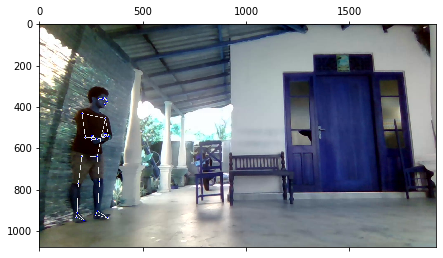

In [7]:
plt.matshow(image)

In [8]:
#np.set_printoptions(threshold=np.inf)
#print(myarray)

In [9]:
key_array = np.delete(myarray, 0, 0)
np.set_printoptions(threshold=np.inf)
print(key_array.shape)
print(len(key_array))

(3975, 33, 4)
3975


In [10]:
output = open('key_data/key_array_test_side.pkl', 'wb')
pickle.dump(key_array, output)
output.close()

# definitions

In [8]:
def time_diff(peaks):
    array=[]
    for i in range(len(peaks)-1):
        td=df.t[peaks[i+1]]-df.t[peaks[i]]
        array.append(td)
    return array

In [9]:
def get_peaks(df,y):
    peaks, _ = find_peaks(-y,prominence=0.03)
    plt.figure(figsize=(20,5))
    plt.plot(df.t,y)
    plt.plot(df.t[peaks], y[peaks],"X",markerfacecolor='red',markersize=8)
    plt.show()
    return peaks

In [10]:
def distribution(data):
    ax=sns.distplot(data,
                kde=True,
                bins=8,
                color='blue',
                hist_kws={"linewidth": 22,'alpha':0.60})
    ax.set(xlabel='Binomial',ylabel='Frequency')
    plt.show()

In [11]:
def remove_time_gap(data):
    from statistics import stdev,mean
    SD=stdev(data)
    m= mean(data)
 
    cut_off = SD * 0.5
    upper =  m + cut_off
    array = [x for x in data if x < upper]
    return array
    

In [12]:
def remove_distinc(array,df,Time_to_index_ratio,y):
    modified_mean= mean(array)
    Distance=Time_to_index_ratio*modified_mean*0.5
    
    peaks, _ = find_peaks(-y,prominence=0.03,distance=Distance)
    plt.figure(figsize=(20,5))
    plt.plot(df.t,y)
    plt.plot(df.t[peaks], y[peaks],"X",markerfacecolor='red',markersize=8)
    plt.show()
    return peaks
    

In [13]:
def sample(df,strike_peak,time_return_points):
    a = np.array(df.t[strike_peak])
    sample_strikes=[]
    for i in range(len(time_return_points)-1):
        index=np.where(np.logical_and(a>=time_return_points.t[i], a<=time_return_points.t[i+1]))
        s = list(map(lambda a : df.t[strike_peak[a]], index[0]))
        sample_strikes.append(s)
    return sample_strikes

In [14]:
def strides(sample_strikes):
    strides=[]
    for strike in sample_strikes:
        sample=[]
        for i in range(len(strike)-1):
            t_diff=strike[i+1]-strike[i]
            sample.append(t_diff)
        strides.append(sample)
    return strides
    

In [15]:
def com(A,B):
    if type(A)==np.ndarray:
        C= A.tolist()
    else:
        C=A
    for i,v in enumerate(B):
        C.insert(2*i+1,v) 
    return C

In [776]:
name='damith'

In [777]:


f_file = open('key_data/key_array_{}_right.pkl'.format(name), 'rb')

key_array = pickle.load(f_file)
#pprint.pprint(fT)

f_file.close()


# anckle-hip length side

In [778]:
array=[]
for i in range(len(key_array)):
    t=key_array[i][28][3]
    right=abs(key_array[i][24][1]-key_array[i][28][1])
    left=abs(key_array[i][23][1]-key_array[i][27][1])
    heel_r=abs(key_array[i][24][1]-key_array[i][30][1])
    foot_index_r=abs(key_array[i][24][1]-key_array[i][32][1])
    heel_l=abs(key_array[i][23][1]-key_array[i][29][1])
    foot_index_l=abs(key_array[i][23][1]-key_array[i][31][1])
    x=key_array[i][28][0]
    center=(key_array[i][11][0]+key_array[i][12][0]+key_array[i][23][0]+key_array[i][24][0])/4
    array.append([right])
    array[i].append(left)
    array[i].append(heel_r)
    array[i].append(foot_index_r)
    array[i].append(heel_l)
    array[i].append(foot_index_l)
    array[i].append(t)
    array[i].append(x)
    array[i].append(center)
array = np.array(array)
print(array)

[[2.26529211e-01 2.03698665e-01 2.43965834e-01 ... 3.39434862e-01
  2.29326203e-01 2.80454591e-01]
 [2.19731450e-01 2.13688076e-01 2.31882334e-01 ... 4.28982973e-01
  2.33514130e-01 2.88289428e-01]
 [2.18455017e-01 2.14234948e-01 2.31085956e-01 ... 5.11360884e-01
  2.33854219e-01 2.99608953e-01]
 ...
 [2.23034382e-01 2.32334673e-01 2.47253120e-01 ... 2.93944615e+03
  7.31585026e-02 7.56913899e-02]
 [2.28387684e-01 2.33457893e-01 2.50047296e-01 ... 2.93955081e+03
  7.03770667e-02 7.47365598e-02]
 [2.32257217e-01 2.35706270e-01 2.54683346e-01 ... 2.93965316e+03
  3.87653373e-02 6.83089038e-02]]


In [779]:
df = pd.DataFrame(array,columns=['r','l','h_R','f_R','h_L','f_L','t','x','center'])
print(df)

              r         l       h_R       f_R       h_L       f_L  \
0      0.226529  0.203699  0.243966  0.250227  0.232409  0.220661   
1      0.219731  0.213688  0.231882  0.249602  0.235696  0.224766   
2      0.218455  0.214235  0.231086  0.256212  0.233799  0.233950   
3      0.206709  0.212662  0.222423  0.247351  0.231281  0.232512   
4      0.210612  0.215795  0.222706  0.259695  0.235292  0.235448   
...         ...       ...       ...       ...       ...       ...   
30005  0.213177  0.241005  0.230252  0.229235  0.260629  0.257010   
30006  0.220095  0.237494  0.243342  0.237554  0.258508  0.253455   
30007  0.223034  0.232335  0.247253  0.234049  0.255520  0.247268   
30008  0.228388  0.233458  0.250047  0.235083  0.256141  0.248059   
30009  0.232257  0.235706  0.254683  0.241284  0.253836  0.254767   

                 t         x    center  
0         0.339435  0.229326  0.280455  
1         0.428983  0.233514  0.288289  
2         0.511361  0.233854  0.299609  
3      

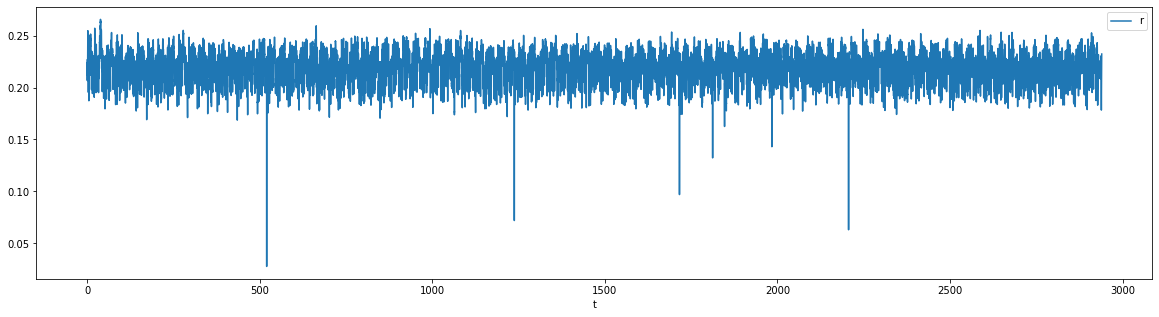

In [780]:
df.plot(x ='t', y='r', kind = 'line',figsize=(20,5))
plt.show()

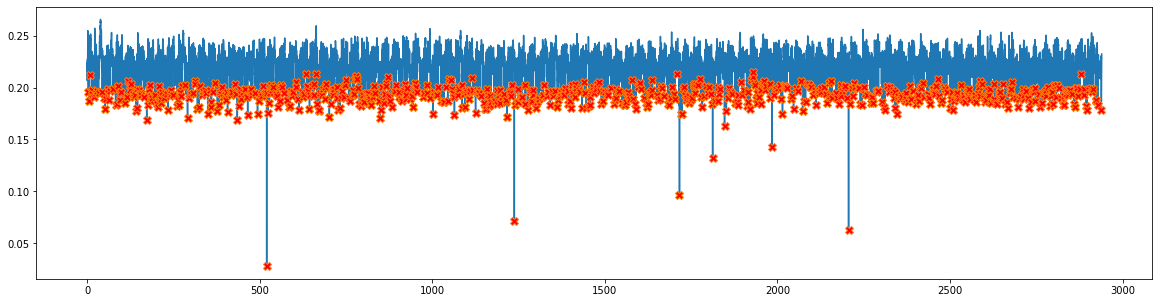

In [781]:
peaks=get_peaks(df,df.r)

In [782]:

Time_to_index_ratio=(peaks[1]-peaks[0])/(df.t[peaks[1]]-df.t[peaks[0]])
print(Time_to_index_ratio)

11.538359682429256


# walking direction

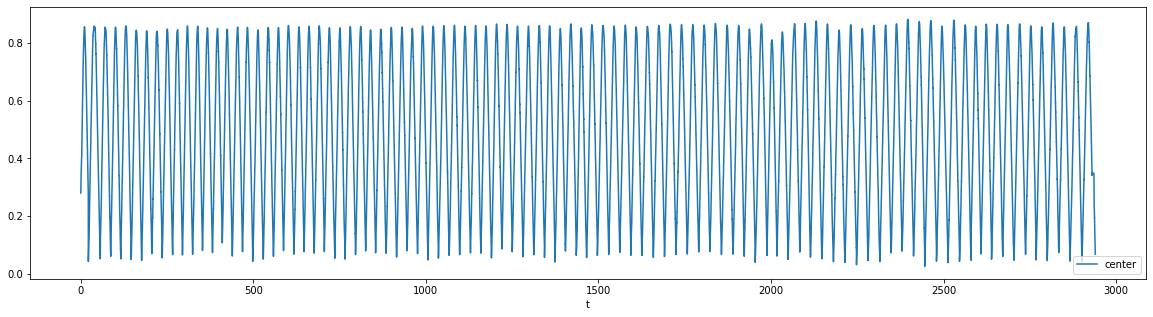

In [783]:
df.plot(x ='t', y='center', kind = 'line',figsize=(20,5))
plt.show()

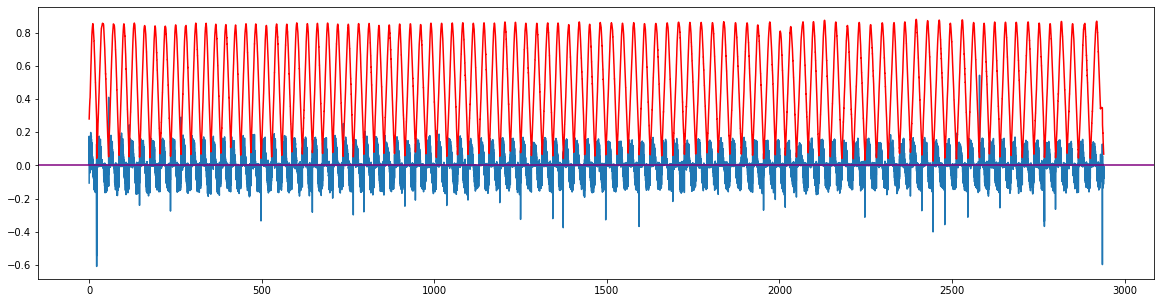

In [784]:
from scipy.interpolate import UnivariateSpline

spl = UnivariateSpline(df.t, df.center, k=4, s=0)
diffspl = spl.derivative()

plt.figure(figsize=(20,5))
plt.plot(df.t,diffspl(df.t))
plt.plot(df.t,df.center,'r')
plt.axhline(y=0, color='purple', linestyle='-')
plt.show()



[110, 223, 404, 585, 732, 898, 1051, 1210, 1370, 1528, 1688, 1850, 2009, 2158, 2318, 2473, 2633, 2792, 2947, 3090, 3242, 3397, 3554, 3697, 3850, 4000, 4153, 4296, 4447, 4598, 4760, 4909, 5058, 5216, 5381, 5535, 5689, 5843, 6001, 6148, 6303, 6468, 6625, 6774, 6932, 7087, 7246, 7399, 7559, 7719, 7880, 8032, 8193, 8347, 8509, 8657, 8813, 8961, 9121, 9275, 9439, 9593, 9761, 9909, 10072, 10227, 10383, 10546, 10709, 10860, 11031, 11188, 11350, 11503, 11670, 11830, 11990, 12145, 12303, 12461, 12621, 12780, 12937, 13087, 13251, 13411, 13578, 13733, 13903, 14052, 14212, 14362, 14528, 14676, 14844, 15001, 15151, 15299, 15457, 15614, 15784, 15948, 16108, 16269, 16434, 16592, 16752, 16915, 17081, 17247, 17410, 17572, 17743, 17912, 18081, 18247, 18415, 18581, 18743, 18905, 19072, 19242, 19409, 19573, 19745, 19903, 20061, 20227, 20411, 20567, 20711, 20853, 21014, 21175, 21370, 21515, 21669, 21826, 21993, 22158, 22318, 22488, 22650, 22818, 22989, 23146, 23312, 23478, 23647, 23814, 23981, 24139, 24297

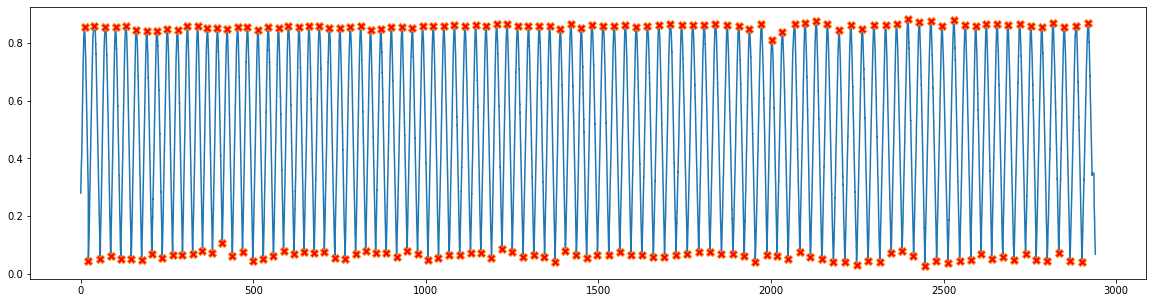

In [785]:
return_points_plus , _ = find_peaks(df.center,prominence=0.05)
return_points_minus , _ = find_peaks(-df.center,prominence=0.05)
if return_points_plus[0]<return_points_minus[0]:
    return_points=com(return_points_plus,return_points_minus)
else:
    return_points=com(return_points_minus,return_points_plus)
print(return_points)
time_return_points=pd.DataFrame(df.t[return_points],columns=['t']).reset_index()
print(time_return_points)
plt.figure(figsize=(20,5))
plt.plot(df.t,df.center)
plt.plot(df.t[return_points], df.center[return_points],"X",markerfacecolor='red',markersize=8)
plt.show()

In [786]:
a = diffspl(df.t)
zero_crossings = np.where(np.diff(np.sign(a)))[0]
print(zero_crossings)

[    0    16    17 ... 29986 29988 29989]


In [787]:
if df.center[zero_crossings[0]]>df.center[zero_crossings[1]]:
    plus=1
    minus=0
elif df.center[zero_crossings[0]]<df.center[zero_crossings[1]]:
    plus=0
    minus=1
else:
    print("error in direction detection")

In [788]:
print(plus,minus)

0 1


In [789]:
plus=1
minus=0

In [790]:
df['velocity'] = diffspl(df.t)
print(df)

              r         l       h_R       f_R       h_L       f_L  \
0      0.226529  0.203699  0.243966  0.250227  0.232409  0.220661   
1      0.219731  0.213688  0.231882  0.249602  0.235696  0.224766   
2      0.218455  0.214235  0.231086  0.256212  0.233799  0.233950   
3      0.206709  0.212662  0.222423  0.247351  0.231281  0.232512   
4      0.210612  0.215795  0.222706  0.259695  0.235292  0.235448   
...         ...       ...       ...       ...       ...       ...   
30005  0.213177  0.241005  0.230252  0.229235  0.260629  0.257010   
30006  0.220095  0.237494  0.243342  0.237554  0.258508  0.253455   
30007  0.223034  0.232335  0.247253  0.234049  0.255520  0.247268   
30008  0.228388  0.233458  0.250047  0.235083  0.256141  0.248059   
30009  0.232257  0.235706  0.254683  0.241284  0.253836  0.254767   

                 t         x    center  velocity  
0         0.339435  0.229326  0.280455 -0.106408  
1         0.428983  0.233514  0.288289  0.176403  
2         0.511361

In [791]:
df_plus=df[df.velocity > 0] 
df_minus=df[df.velocity < 0]
df_plus =df_plus.reset_index()
df_minus=df_minus.reset_index()
print(df_plus)
print(df_minus)

       index         r         l       h_R       f_R       h_L       f_L  \
0          1  0.219731  0.213688  0.231882  0.249602  0.235696  0.224766   
1          2  0.218455  0.214235  0.231086  0.256212  0.233799  0.233950   
2          3  0.206709  0.212662  0.222423  0.247351  0.231281  0.232512   
3          4  0.210612  0.215795  0.222706  0.259695  0.235292  0.235448   
4          5  0.214392  0.220328  0.216564  0.268618  0.232902  0.242030   
...      ...       ...       ...       ...       ...       ...       ...   
15745  29974  0.215049  0.209641  0.234541  0.242693  0.222362  0.241762   
15746  29980  0.220574  0.195927  0.239117  0.249831  0.195238  0.240069   
15747  29983  0.224351  0.218522  0.246007  0.257100  0.234329  0.255664   
15748  29986  0.226699  0.231384  0.251449  0.238612  0.250186  0.249554   
15749  29989  0.228216  0.226992  0.251163  0.234372  0.248210  0.224155   

                 t         x    center  velocity  
0         0.428983  0.233514  0.2882

# Right leg

# walking left to right-plus direction

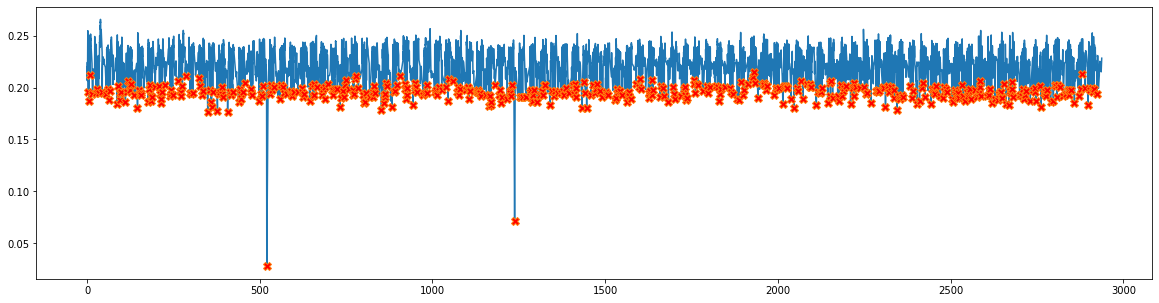

In [792]:
peaks=get_peaks(df_plus,df_plus.r)

[1.4568920135498047, 2.856825828552246, 2.4710402488708496, 3.9071757793426514, 3.651102304458618, 3.2350614070892334, 6.9318811893463135, 1.0807785987854004, 3.231971502304077, 2.8065247535705566, 3.671624183654785, 4.136028289794922, 3.699598789215088, 3.4986155033111572, 1.8620491027832031, 1.7318859100341797, 4.610067367553711, 0.305894136428833, 3.3804116249084473, 3.01666522026062, 1.9092066287994385, 1.199789047241211, 5.170201778411865, 1.287400245666504, 3.572615385055542, 1.8466405868530273, 1.7109394073486328, 1.6789050102233887, 1.6576650142669678, 5.448182582855225, 4.0905845165252686, 1.6657330989837646, 1.346642017364502, 1.478083848953247, 1.8098819255828857, 3.790989875793457, 4.225752115249634, 1.6616921424865723, 1.9688353538513184, 1.6965534687042236, 2.172492504119873, 4.507403373718262, 4.8027427196502686, 1.2208032608032227, 1.6618454456329346, 3.834591865539551, 3.8437347412109375, 2.3047988414764404, 1.6622157096862793, 1.7751340866088867, 3.5650675296783447, 5

/home/jayasanka/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


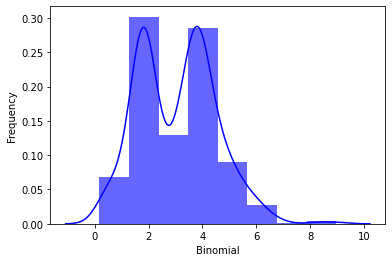

In [793]:
dt_plus_right=time_diff(peaks)
print(dt_plus_right)
distribution(dt_plus_right)

[1.4568920135498047, 2.856825828552246, 2.4710402488708496, 3.651102304458618, 3.2350614070892334, 1.0807785987854004, 3.231971502304077, 2.8065247535705566, 3.671624183654785, 3.699598789215088, 3.4986155033111572, 1.8620491027832031, 1.7318859100341797, 0.305894136428833, 3.3804116249084473, 3.01666522026062, 1.9092066287994385, 1.199789047241211, 1.287400245666504, 3.572615385055542, 1.8466405868530273, 1.7109394073486328, 1.6789050102233887, 1.6576650142669678, 1.6657330989837646, 1.346642017364502, 1.478083848953247, 1.8098819255828857, 1.6616921424865723, 1.9688353538513184, 1.6965534687042236, 2.172492504119873, 1.2208032608032227, 1.6618454456329346, 2.3047988414764404, 1.6622157096862793, 1.7751340866088867, 3.5650675296783447, 3.7286007404327393, 3.049572706222534, 3.539651393890381, 3.5321829319000244, 3.3891634941101074, 3.737504243850708, 1.2176520824432373, 1.7453558444976807, 3.18521785736084, 0.4782986640930176, 3.208220958709717, 3.4772040843963623, 1.9614710807800293,

/home/jayasanka/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


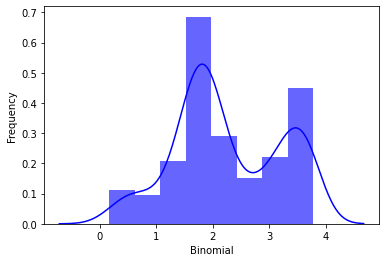

In [794]:
dt_plus_right_new=remove_time_gap(dt_plus_right)
print(dt_plus_right_new)
distribution(dt_plus_right_new)

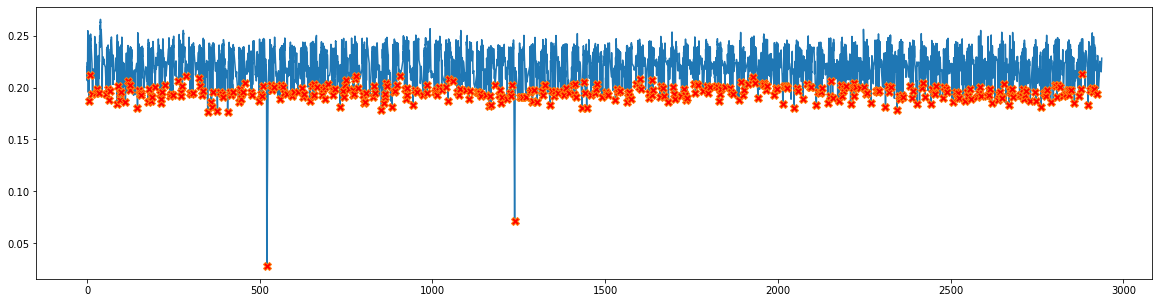

In [795]:
plus_peaks_R=remove_distinc(dt_plus_right,df_plus,Time_to_index_ratio,df_plus.r)

/home/jayasanka/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


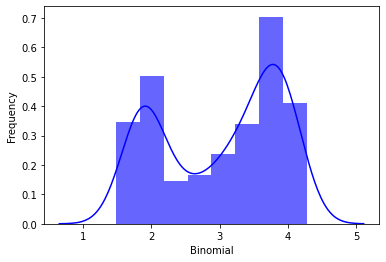

In [796]:
dt_plus_right=time_diff(plus_peaks_R)
dt_plus_right_cleaned=remove_time_gap(dt_plus_right)
distribution(dt_plus_right_cleaned)

# Walking right to Left - minus direction

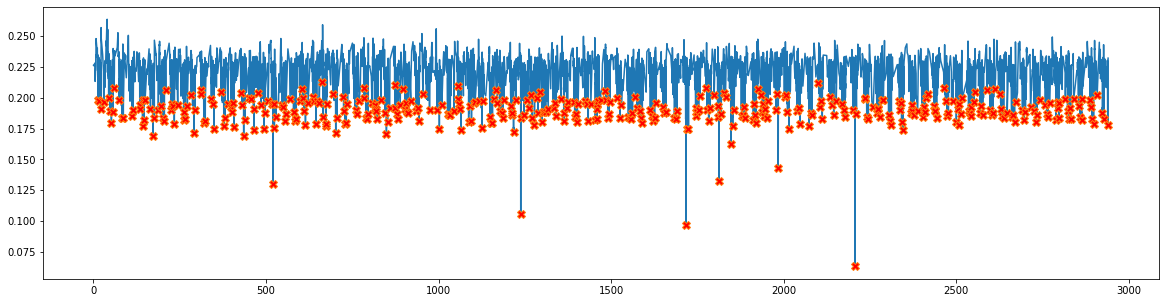

In [797]:
peaks=get_peaks(df_minus,df_minus.r)

[2.1399238109588623, 4.521340847015381, 1.679541826248169, 4.742196798324585, 3.203991413116455, 3.848527193069458, 3.9665253162384033, 0.8808209896087646, 4.431820392608643, 6.4699318408966064, 3.746168375015259, 10.322107076644897, 3.8810932636260986, 5.162110090255737, 0.5943830013275146, 6.142666816711426, 2.0951502323150635, 1.8834397792816162, 0.4941060543060303, 4.160155534744263, 6.920743942260742, 3.1191823482513428, 0.7681524753570557, 4.44047737121582, 4.061456203460693, 3.328451156616211, 0.8921623229980469, 2.904111862182617, 2.4883885383605957, 3.3981220722198486, 3.2745211124420166, 2.5846965312957764, 9.807071924209595, 1.9687895774841309, 1.5569024085998535, 1.4783697128295898, 2.716968297958374, 6.987987756729126, 3.192462921142578, 3.014582633972168, 0.5947372913360596, 7.0148091316223145, 3.353123903274536, 3.031898260116577, 3.230499029159546, 4.017529010772705, 5.867128372192383, 7.835758209228516, 3.277496099472046, 1.157519817352295, 2.487393617630005, 2.9806108

/home/jayasanka/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


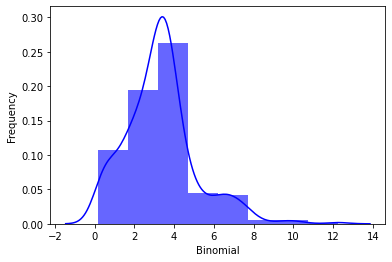

In [798]:
dt_minus_right=time_diff(peaks)
print(dt_minus_right)
distribution(dt_minus_right)

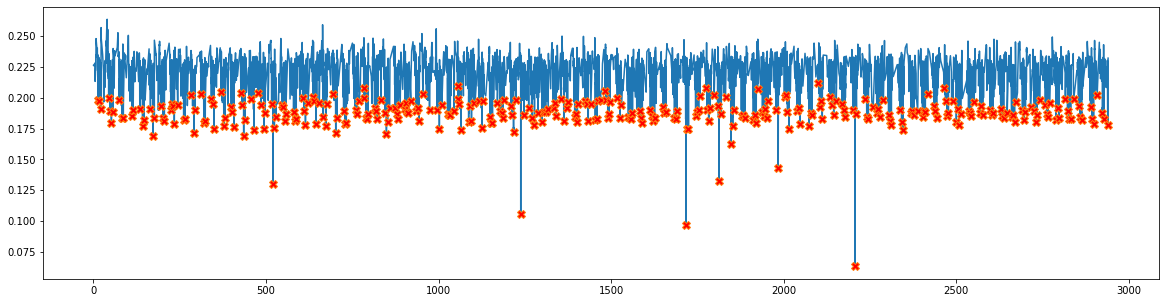

In [799]:
minus_peaks_R=remove_distinc(dt_minus_right,df_minus,Time_to_index_ratio,df_minus.r)

/home/jayasanka/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


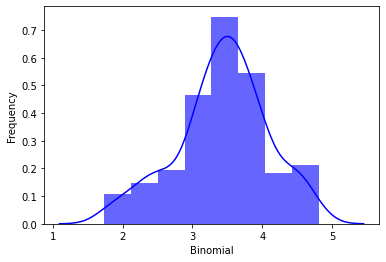

In [800]:
dt_minus_right=time_diff(minus_peaks_R)
dt_minus_right_cleaned=remove_time_gap(dt_minus_right)
distribution(dt_minus_right_cleaned)

# sampling- right leg

In [801]:
sample_strikes_plus_R=sample(df_plus,plus_peaks_R,time_return_points)
sample_strikes_minus_R=sample(df_minus,minus_peaks_R,time_return_points)

In [802]:
strides_plus_R=strides(sample_strikes_plus_R)
strides_minus_R=strides(sample_strikes_minus_R)
print(strides_plus_R)
print('\n')
print(strides_minus_R)

[[], [4.012112140655518, 3.329468011856079], [], [3.4691648483276367, 3.7929396629333496], [], [3.5969460010528564, 1.7763519287109375, 1.428295373916626], [], [3.5522499084472656, 2.0399599075317383], [], [1.9313874244689941, 1.8598201274871826, 1.8779785633087158, 1.5618782043457031], [], [3.859447717666626, 1.7719030380249023, 1.76639986038208], [], [2.010136365890503, 1.7195794582366943, 1.8626453876495361], [], [3.9028544425964355, 3.666635036468506], [], [1.986846685409546, 3.4222071170806885], [], [3.641056537628174, 3.5980169773101807], [], [3.7952847480773926, 4.162465572357178, 3.204005241394043], [], [1.9931106567382812, 3.2217743396759033], [], [3.795358180999756, 3.3519158363342285], [], [3.9391543865203857, 3.680964469909668], [], [1.8967487812042236, 1.7530100345611572, 3.7556746006011963], [], [3.5755369663238525], [], [4.057131767272949, 3.423922538757324], [], [3.620762586593628, 3.453192710876465], [], [3.409108877182007, 3.5755932331085205], [], [1.6120545864105225,

In [803]:
avg_stride_plus_R=list(map(lambda a : np.mean(a), strides_plus_R[plus::2]))
avg_stride_minus_R=list(map(lambda a : np.mean(a), strides_minus_R[minus::2]))
print(avg_stride_plus_R)
print('\n')
print(avg_stride_minus_R)

[3.6707900762557983, 3.631052255630493, 2.267197767893473, 2.796104907989502, 1.807766079902649, 2.465916872024536, 1.8641204039255779, 3.7847447395324707, 2.704526901245117, 3.6195367574691772, 3.7205851872762046, 2.6074424982070923, 3.573637008666992, 3.810059428215027, 2.468477805455526, 3.5755369663238525, 3.7405271530151367, 3.5369776487350464, 3.4923510551452637, 2.488292694091797, 3.6298907995224, 2.4205269813537598, 3.0538253784179688, 2.435250759124756, 3.0586150487264, 2.3829498291015625, 2.4029813607533774, 2.906807780265808, 1.7886040210723877, 3.531332492828369, 2.4206643104553223, 3.609653115272522, 1.8300421237945557, 3.845765749613444, 3.6755547523498535, 3.621737003326416, 3.3849196434020996, 2.6472790837287903, 1.950760841369629, 2.396965503692627, 2.520090341567993, 3.7702999114990234, 2.3982120752334595, 2.3820888996124268, 3.5769153833389282, 3.7106317281723022, 2.704345464706421, 3.6528618335723877, 3.7313928604125977, 3.959524989128113, 3.895001173019409, 3.02577

/home/jayasanka/.local/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/jayasanka/.local/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


# Left leg

# walking left to right-plus direction

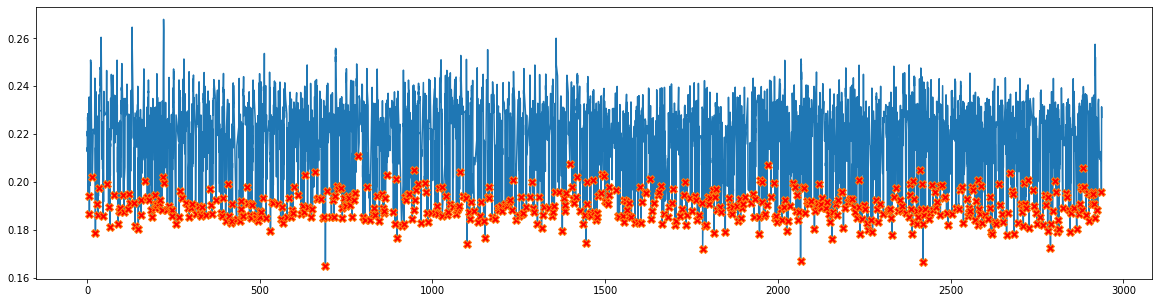

In [804]:
peaks=get_peaks(df_plus,df_plus.l)

[1.6221535205841064, 4.028083801269531, 2.1597156524658203, 3.875765800476074, 3.100895643234253, 3.742433547973633, 5.336178302764893, 2.039201021194458, 3.0758156776428223, 3.262690544128418, 5.384798526763916, 2.744551420211792, 3.386781692504883, 1.4565787315368652, 1.8450427055358887, 5.910760879516602, 0.3175690174102783, 2.250112771987915, 3.5348622798919678, 2.9901769161224365, 6.820476531982422, 0.4940018653869629, 2.7248220443725586, 6.583921194076538, 1.208249568939209, 5.0361809730529785, 0.671025276184082, 2.5989651679992676, 6.110060214996338, 1.4763927459716797, 3.9083855152130127, 0.2791438102722168, 0.3904993534088135, 0.3715696334838867, 1.8294274806976318, 3.685513496398926, 4.655228853225708, 2.570572853088379, 2.7244222164154053, 0.9167883396148682, 2.573782444000244, 2.3032591342926025, 3.935137987136841, 0.9911594390869141, 4.551504135131836, 0.8602509498596191, 3.2026376724243164, 3.567484140396118, 7.1230878829956055, 0.47678709030151367, 1.2692878246307373, 3.

/home/jayasanka/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


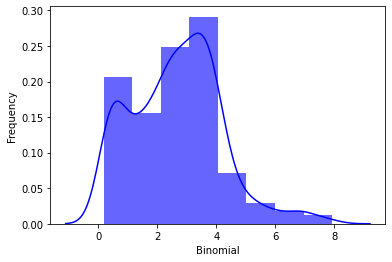

In [805]:
dt_plus_left=time_diff(peaks)
print(dt_plus_left)
distribution(dt_plus_left)

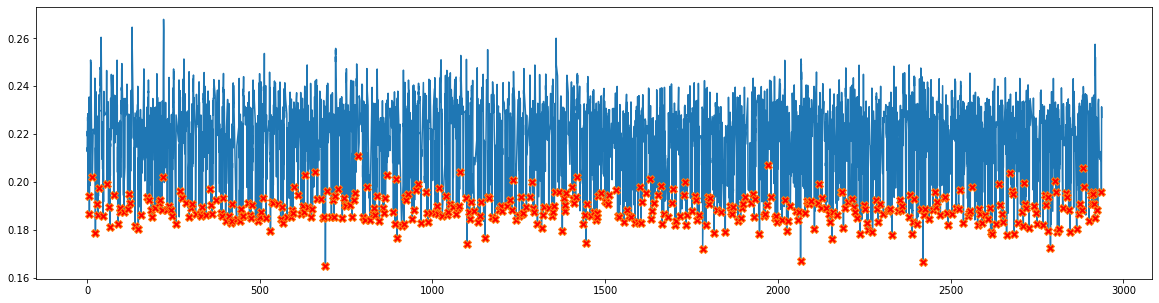

In [806]:
plus_peaks_L=remove_distinc(dt_plus_left,df_plus,Time_to_index_ratio,df_plus.l)

/home/jayasanka/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


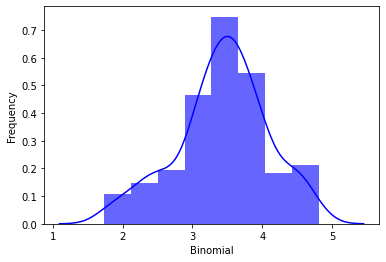

In [807]:
dt_minus_right=time_diff(minus_peaks_R)
dt_minus_right_cleaned=remove_time_gap(dt_minus_right)
distribution(dt_minus_right_cleaned)

# Walking right to Left - minus direction

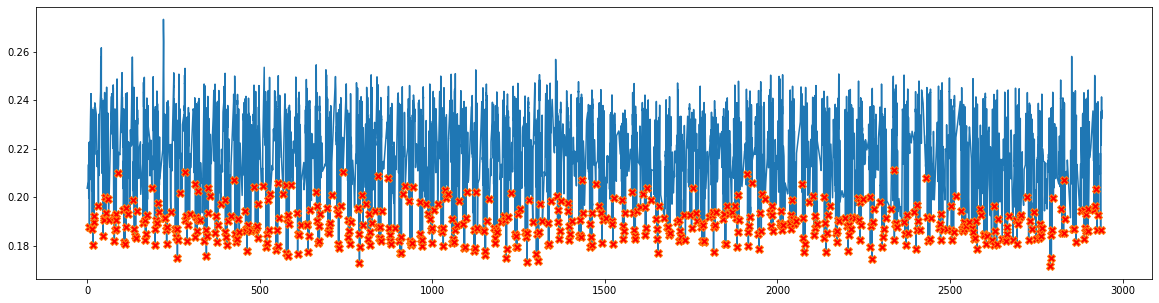

In [808]:
peaks=get_peaks(df_minus,df_minus.l)

[4.791531085968018, 1.5455315113067627, 1.4761760234832764, 1.7174921035766602, 2.07452654838562, 5.994888067245483, 1.5663108825683594, 2.0839715003967285, 1.4699735641479492, 2.2452895641326904, 2.898350954055786, 0.589860200881958, 5.448636054992676, 1.5041964054107666, 1.6931767463684082, 1.6617016792297363, 1.7745678424835205, 0.2982048988342285, 2.2544679641723633, 4.85716700553894, 1.5555706024169922, 1.9322452545166016, 1.6860194206237793, 1.733069658279419, 3.086289644241333, 4.122170686721802, 2.1676242351531982, 1.2429635524749756, 1.534904956817627, 3.4983716011047363, 4.329158782958984, 4.243051528930664, 1.7017054557800293, 1.708333969116211, 3.371548652648926, 2.1924452781677246, 4.335858583450317, 1.4311511516571045, 1.4714086055755615, 1.5278055667877197, 1.331834316253662, 1.8282716274261475, 0.6929037570953369, 2.3371670246124268, 3.1579091548919678, 1.7470529079437256, 1.6476130485534668, 1.695385456085205, 4.164471864700317, 4.910850524902344, 1.6513683795928955, 1

/home/jayasanka/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


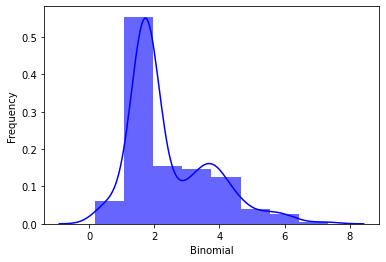

In [809]:

dt_minus_left=time_diff(peaks)
print(dt_minus_left)
distribution(dt_minus_left)

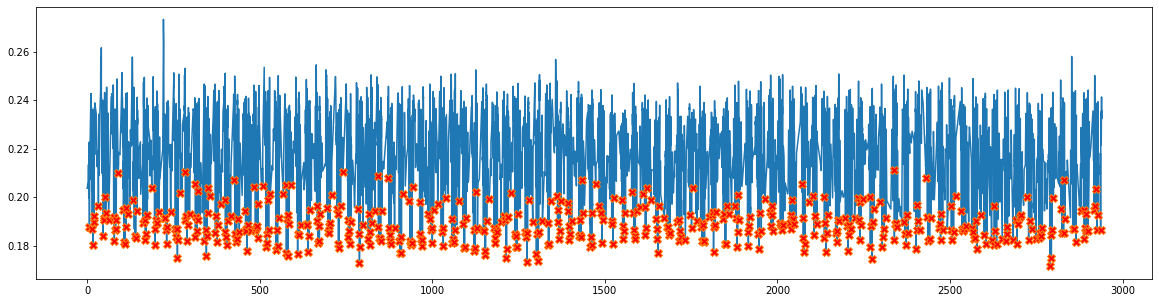

In [810]:
minus_peaks_L=remove_distinc(dt_minus_left,df_minus,Time_to_index_ratio,df_minus.l)

/home/jayasanka/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


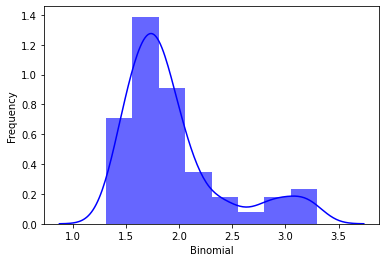

In [811]:
dt_minus_left=time_diff(minus_peaks_L)
dt_minus_left_cleaned=remove_time_gap(dt_minus_left)
distribution(dt_minus_left_cleaned)

# sampling-left leg

In [812]:
sample_strikes_plus_L=sample(df_plus,plus_peaks_L,time_return_points)
sample_strikes_minus_L=sample(df_minus,minus_peaks_L,time_return_points)

In [813]:
strides_plus_L=strides(sample_strikes_plus_L)
strides_minus_L=strides(sample_strikes_minus_L)
print(strides_plus_L)
print('\n')
print(strides_minus_L)

[[], [3.962618350982666, 3.465332269668579, 3.8265559673309326], [], [4.0700438022613525, 3.5331778526306152], [], [5.176111936569214, 1.7939097881317139], [], [4.038761615753174, 3.1535537242889404], [], [7.226404428482056], [], [7.2992494106292725, 1.467505693435669], [], [4.116426229476929, 4.562687635421753, 2.1089704036712646], [], [3.0759024620056152, 5.437795639038086], [], [3.89676833152771], [], [4.268811464309692, 3.955482244491577], [], [3.574059247970581, 3.5287466049194336], [], [3.5547380447387695, 3.752922773361206], [], [3.66269588470459, 1.4144446849822998], [], [4.543985605239868, 3.016526699066162, 2.230703115463257], [], [3.7981221675872803, 3.6967034339904785, 1.53568696975708], [], [4.073188066482544, 3.465949296951294], [], [3.8773655891418457, 3.64620041847229], [], [3.9410674571990967, 3.098562240600586], [], [3.990992307662964, 3.472231388092041], [], [3.8540115356445312, 3.2148454189300537, 3.4878547191619873], [], [4.094558238983154, 3.488532543182373, 3.572

In [814]:
avg_stride_plus_L=list(map(lambda a : np.mean(a), strides_plus_L[plus::2]))
avg_stride_minus_L=list(map(lambda a : np.mean(a), strides_minus_L[minus::2]))
print(avg_stride_plus_L)
print('\n')
print(avg_stride_minus_L)

[3.751502195994059, 3.801610827445984, 3.485010862350464, 3.596157670021057, 7.226404428482056, 4.383377552032471, 3.5960280895233154, 4.256849050521851, 3.89676833152771, 4.112146854400635, 3.5514029264450073, 3.653830409049988, 2.538570284843445, 3.263738473256429, 3.010170857111613, 3.769568681716919, 3.761783003807068, 3.5198148488998413, 3.7316118478775024, 3.518903891245524, 3.7183656692504883, 4.863891959190369, 3.7935221989949546, 3.776117483774821, 3.4028751850128174, 4.325824499130249, 5.483316898345947, 3.6190292835235596, 3.569824775060018, 3.6587440967559814, 3.6739558378855386, 5.443088054656982, 3.1316304206848145, 3.6742397944132485, 3.2267443339029946, 3.7990748087565103, 3.7467807133992515, 5.224844694137573, 5.28684389591217, 5.250228762626648, 3.2434921264648438, 3.586590528488159, 3.7077696323394775, 3.6099090576171875, 3.5025644302368164, 2.759278893470764, 3.7055441538492837, 3.6811582247416177, 2.7809178829193115, 3.6418068408966064, 4.632659196853638, 6.0843138

# define feature vector array

In [815]:
TP_side=[]

In [816]:
T_s=[[[None],[None]],[[None],[None]],[[None],[None]],[[None],[None]],[None],[None],[None],[None]]

# stride time 

In [817]:
def comb_dir_arrays(plus_array,minus_array,plus,minus):   
    if plus<minus:
        array=com(plus_array,minus_array)
    elif plus>minus:
        array=com(minus_array,plus_array)
    return array

In [818]:
T3=comb_dir_arrays(avg_stride_plus_R,avg_stride_minus_R,plus,minus)

In [819]:
T4=comb_dir_arrays(avg_stride_plus_L,avg_stride_minus_L,plus,minus)

In [820]:
T_s[1][0]=T3
T_s[1][1]=T4

# step time calculate

In [821]:
def step_time(right,left):
    L_array=[]
    R_array=[]
    try:
        if len(right)==len(left):
            if left[0]>right[0]:
                #print(1)
                Lstep=np.subtract(left,right) 
                L_array=Lstep
                Rstep=np.subtract(right[1:],left[:-1]) 
                R_array=Rstep
            else:
                #print(2)
                Rstep=np.subtract(right,left)
                R_array=Rstep
                Lstep=np.subtract(left[1:],right[:-1]) 
                L_array=Lstep

        elif (len(right)+1)==len(left):#when left strides are max by one
            if right[0]>left[0]:
                #print(3)
                Lstep=np.subtract(left[1:],right) 
                L_array=Lstep
                Rstep=np.subtract(right,left[:-1]) 
                R_array=Rstep

        elif len(right)==(len(left)+1):#when right strides are max by one
            if left[0]>right[0]:
                #print(4)
                Lstep=np.subtract(left,right[:-1]) 
                L_array=Lstep
                Rstep=np.subtract(right[1:],left) 
                R_array=Rstep

        else:
            #print(5)
            L_array.append('ooa')
            R_array.append('ooa')
    except:
        L_array.append('ooa')
        R_array.append('ooa')
        
    return R_array,L_array
                
    

In [822]:
def step_time_array(sample_strikes_R,sample_strikes_L):
    R_st_array=[]
    L_st_array=[]
    for i in range(len(sample_strikes_R)):
        if not len(sample_strikes_R[i])==0:
            Rst,Lst=step_time(sample_strikes_R[i],sample_strikes_L[i])
            R_st_array.append(Rst)
            L_st_array.append(Lst)
    return R_st_array,L_st_array
        

# plus direction

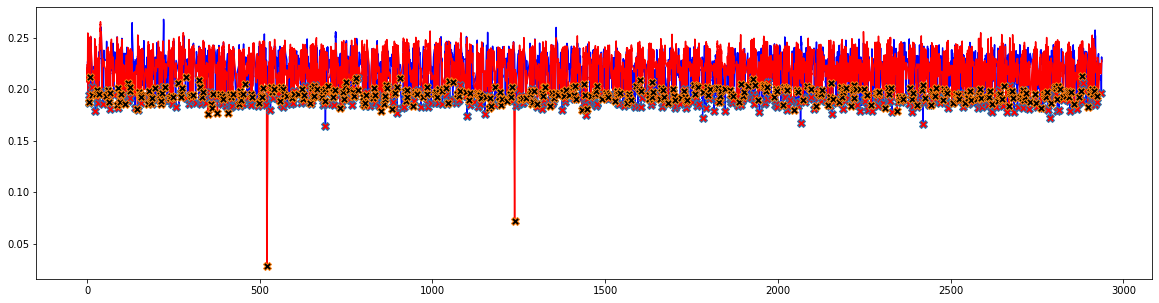

In [823]:
plt.figure(figsize=(20,5))
plt.plot(df_plus.t,df_plus.l,'b')
plt.plot(df_plus.t,df_plus.r,'r')
plt.plot(df_plus.t[plus_peaks_L], df_plus.l[plus_peaks_L],"X",markerfacecolor='red',markersize=8)
plt.plot(df_plus.t[plus_peaks_R], df_plus.r[plus_peaks_R],"X",markerfacecolor='black',markersize=8)
plt.show()

In [824]:
print(sample_strikes_plus_L)
print(sample_strikes_plus_R)

[[15.57442307472229], [24.159377336502075, 28.12199568748474, 31.58732795715332, 35.41388392448425], [46.075876235961914], [58.2604820728302, 62.33052587509155, 65.86370372772217], [77.25253868103027], [88.91506958007812, 94.09118151664734, 95.88509130477905], [107.31387853622437], [117.73596501350403, 121.7747266292572, 124.92828035354614], [138.62209367752075], [148.55086541175842, 155.77726984024048], [174.6049771308899], [178.91593408584595, 186.21518349647522, 187.6826891899109], [195.46439671516418], [207.7583131790161, 211.87473940849304, 216.4374270439148, 218.54639744758606], [232.3900043964386], [238.6488699913025, 241.7247724533081, 247.1625680923462], [257.5250737667084], [270.4689176082611, 274.3656859397888], [285.08626890182495], [296.1438522338867, 300.4126636981964, 304.368145942688], [314.15930819511414], [326.9358232021332, 330.50988245010376, 334.0386290550232], [343.63744616508484], [354.73286294937134, 358.2876009941101, 362.0405237674713], [373.60334515571594], [

In [825]:
sample_strikes_plus_L = sample_strikes_plus_L[plus::2]
sample_strikes_plus_R = sample_strikes_plus_R[plus::2]

In [826]:
step_plus_R,_=step_time_array(sample_strikes_plus_R,sample_strikes_plus_L)
step_plus_L,_=step_time_array(sample_strikes_plus_L,sample_strikes_plus_R)

In [827]:
print(step_plus_R)
print(step_plus_L)

[array([1.75661039, 1.80610418, 1.67023993]), array([2.22675872, 1.62587976, 1.88564157]), [], array([1.94171476, 1.45520306, 0.34160924]), ['ooa'], [], array([ 3.81474614,  1.70845628, -1.1346519 , -1.38097692]), array([1.68242955, 2.50938153, 0.73822093]), [], array([2.55259395, 1.92483902, 1.56737375]), array([1.2083149 , 1.79672122, 1.47197986]), array([3.6534481 , 2.09182072, 1.56067228]), array([1.80397701, 1.49319696]), array([2.58339548, 1.97856426, 2.64300203]), array([ 1.70308971, -0.19828367, -2.14197707,  0.07801056]), array([3.86861348, 3.37096238]), array([1.85770488, 2.03747106, 1.81519318]), array([1.78321075, 1.46290588, 1.81753635]), array([2.20233178, 1.62044835, 1.7238102 ]), array([3.65190196, 1.40994501, 1.55963039]), array([1.88797593, 1.27095771, 1.56466675]), [], array([ 1.86398387,  1.88716888,  1.97827053, -0.35510659]), array([ 1.76452947, -0.09330797, -1.56571817, -2.25807071]), array([ 0.69869828,  0.58603358,  1.57108831, -0.33408213]), ['ooa'], [], [], [

# minus direction

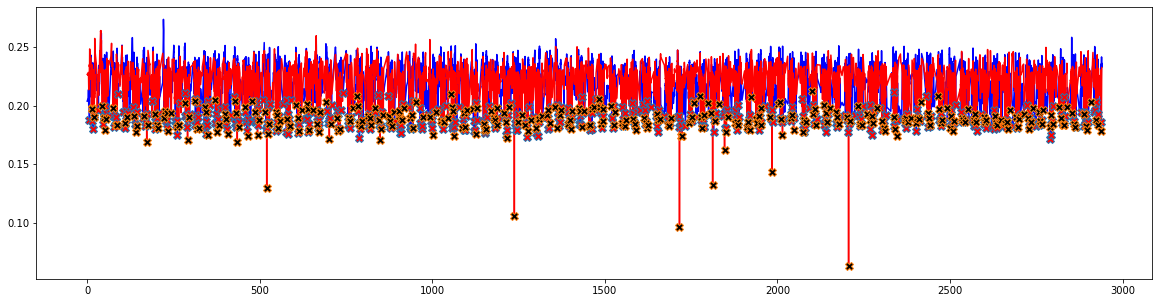

In [828]:
plt.figure(figsize=(20,5))
plt.plot(df_minus.t,df_minus.l,'b')
plt.plot(df_minus.t,df_minus.r,'r')
plt.plot(df_minus.t[minus_peaks_L], df_minus.l[minus_peaks_L],"X",markerfacecolor='red',markersize=8)
plt.plot(df_minus.t[minus_peaks_R], df_minus.r[minus_peaks_R],"X",markerfacecolor='black',markersize=8)
plt.show()

In [829]:
print(sample_strikes_minus_L)
print(sample_strikes_minus_R)

[[15.184922933578491, 17.105961084365845, 18.95160222053528, 20.690013885498047], [32.90785479545593], [46.169546127319336, 47.928858518600464, 50.150312423706055, 51.61656665802002, 53.956666469573975], [62.429397106170654], [77.15550351142883, 78.98970365524292, 80.98211550712585, 82.64082193374634, 84.61269497871399], [89.88029646873474], [105.4821662902832, 107.4105613231659, 109.46950769424438, 111.3895103931427, 113.11984014511108], [117.43888759613037], [134.2909288406372, 138.52815985679626, 140.57816791534424, 144.08672881126404], [], [162.4884696006775, 166.9658682346344, 169.12325763702393, 170.99775004386902, 174.50076127052307], [187.35443377494812], [195.65217447280884, 197.49602937698364, 199.4563913345337, 201.55754780769348, 203.21926164627075], [207.66079092025757], [223.12041115760803, 226.50612878799438, 228.53166437149048, 230.53500533103943, 232.29012608528137], [242.42520475387573], [255.8562650680542, 257.6181044578552, 259.56994104385376, 261.7725872993469, 263

In [830]:
sample_strikes_minus_L = sample_strikes_minus_L[minus::2]
sample_strikes_minus_R = sample_strikes_minus_R[minus::2]

In [831]:
print(sample_strikes_minus_L)
print(sample_strikes_minus_R)

[[15.184922933578491, 17.105961084365845, 18.95160222053528, 20.690013885498047], [46.169546127319336, 47.928858518600464, 50.150312423706055, 51.61656665802002, 53.956666469573975], [77.15550351142883, 78.98970365524292, 80.98211550712585, 82.64082193374634, 84.61269497871399], [105.4821662902832, 107.4105613231659, 109.46950769424438, 111.3895103931427, 113.11984014511108], [134.2909288406372, 138.52815985679626, 140.57816791534424, 144.08672881126404], [162.4884696006775, 166.9658682346344, 169.12325763702393, 170.99775004386902, 174.50076127052307], [195.65217447280884, 197.49602937698364, 199.4563913345337, 201.55754780769348, 203.21926164627075], [223.12041115760803, 226.50612878799438, 228.53166437149048, 230.53500533103943, 232.29012608528137], [255.8562650680542, 257.6181044578552, 259.56994104385376, 261.7725872993469, 263.4638874530792], [282.9263517856598, 285.17977261543274, 286.96101546287537, 289.06009674072266, 292.77357029914856], [311.73810744285583, 314.0670795440674

In [832]:
step_minus_R,_=step_time_array(sample_strikes_minus_R,sample_strikes_minus_L)
step_minus_L,_=step_time_array(sample_strikes_minus_L,sample_strikes_minus_R)

In [833]:
print(step_minus_R,step_minus_L)

[[], [], ['ooa'], ['ooa'], array([0.69737601, 3.79344511, 5.43684959]), ['ooa'], ['ooa'], array([0.85482383, 0.187644  , 2.10115933, 3.74229836]), ['ooa'], ['ooa'], ['ooa'], ['ooa'], [], ['ooa'], array([0.30408263, 1.77642775, 4.14823413, 5.86578417]), ['ooa'], ['ooa'], [], array([2.23485017, 3.98695564, 5.95643783]), ['ooa'], array([0.4019649 , 2.28728032]), ['ooa'], ['ooa'], ['ooa'], ['ooa'], ['ooa'], array([0.90166736, 1.66048765, 4.13895082, 4.41138244]), ['ooa'], ['ooa'], ['ooa'], [], ['ooa'], ['ooa'], ['ooa'], array([2.0790956 , 3.71023607]), [], [], [], ['ooa'], array([0.20516777, 1.79561543, 3.85680318, 4.26258397]), ['ooa'], ['ooa'], ['ooa'], [], [], ['ooa'], ['ooa'], ['ooa'], [], array([1.54581308, 2.18983603, 1.95317078, 0.10785389]), [], array([0.51485229, 2.47111893, 4.11704755, 6.10378909]), ['ooa'], array([2.06733918, 2.49676108, 4.08870649, 6.14002228]), ['ooa'], array([1.97121358, 4.06349277, 6.063586  ]), ['ooa'], array([2.30825973, 2.09292674, 2.28807521]), ['ooa'], 

In [834]:
avg_step_plus_L=list(map(lambda a : np.mean(a) if a!=['ooa'] else ['ooa'], step_plus_L))
avg_step_minus_L=list(map(lambda a : np.mean(a) if a!=['ooa'] else ['ooa'], step_minus_L))
avg_step_plus_R=list(map(lambda a : np.mean(a) if a!=['ooa'] else ['ooa'], step_plus_R))
avg_step_minus_R=list(map(lambda a : np.mean(a) if a!=['ooa'] else ['ooa'], step_minus_R))

/tmp/ipykernel_16589/3252339705.py:1: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  avg_step_plus_L=list(map(lambda a : np.mean(a) if a!=['ooa'] else ['ooa'], step_plus_L))
/home/jayasanka/.local/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/jayasanka/.local/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/tmp/ipykernel_16589/3252339705.py:2: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  avg_step_minus_L=list(map(lambda a : np.mean(a) if a!=['ooa'] else ['ooa'], step_minus_L))
/tmp/ipykernel_16589/3252339705.py:3: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform 

In [835]:
T1=comb_dir_arrays(avg_step_plus_R,avg_step_minus_R,plus,minus)
T2=comb_dir_arrays(avg_step_plus_L,avg_step_minus_L,plus,minus)

In [836]:
T_s[0][0]=T1
T_s[0][1]=T2

# find heel strike and toe-off time-Right

# plus direction-Right

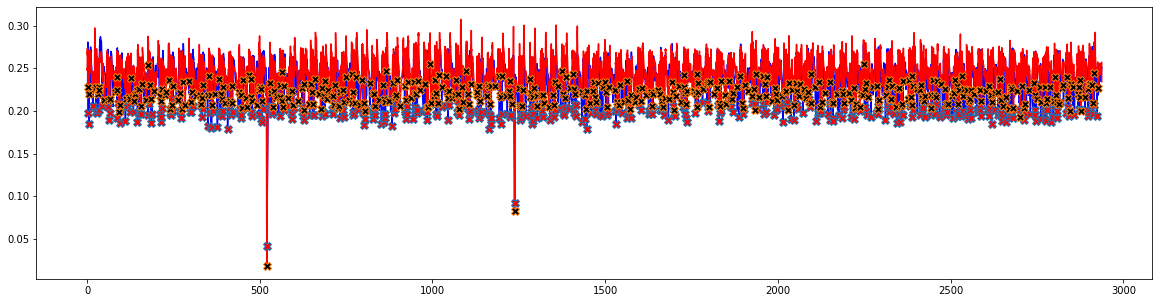

In [837]:
h_valley_plus_R, _ = find_peaks(-df_plus.h_R,prominence=0.05)
f_valley_plus_R, _ = find_peaks(-df_plus.f_R,prominence=0.025)
plt.figure(figsize=(20,5))
plt.plot(df_plus.t,df_plus.h_R,'b')
plt.plot(df_plus.t,df_plus.f_R,'r')
plt.plot(df_plus.t[h_valley_plus_R], df_plus.h_R[h_valley_plus_R],"X",markerfacecolor='red',markersize=8)
plt.plot(df_plus.t[f_valley_plus_R], df_plus.f_R[f_valley_plus_R],"X",markerfacecolor='black',markersize=8)
plt.show()

# outlier remove-plus-Right

/home/jayasanka/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


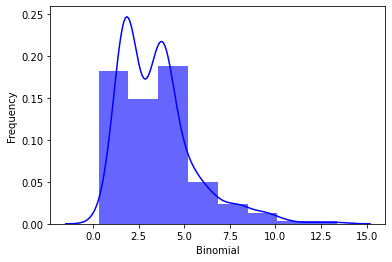

/home/jayasanka/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


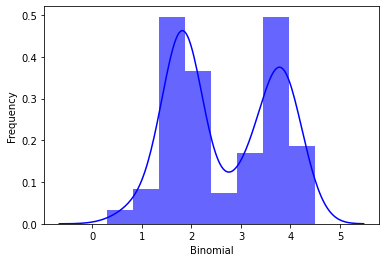

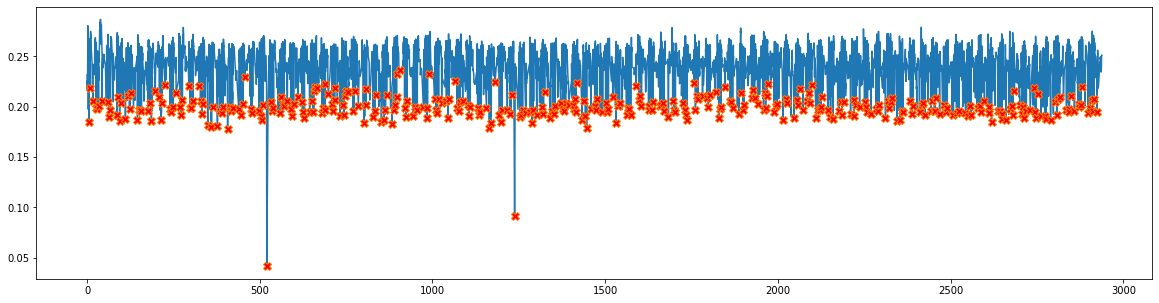

/home/jayasanka/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


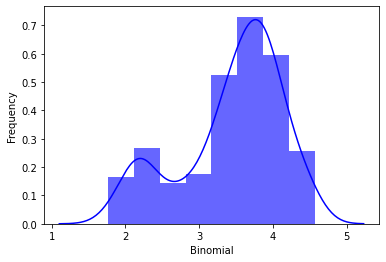

In [838]:
#toe off
dt_plus_to_r=time_diff(h_valley_plus_R)
distribution(dt_plus_to_r)
dt_plus_to_r_new=remove_time_gap(dt_plus_to_r)
distribution(dt_plus_to_r_new)
plus_peaks_to_r=remove_distinc(dt_plus_to_r,df_plus,Time_to_index_ratio,df_plus.h_R)
dt_plus_to_r=time_diff(plus_peaks_to_r)
dt_plus_to_r_cleaned=remove_time_gap(dt_plus_to_r)
distribution(dt_plus_to_r_cleaned)

/home/jayasanka/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


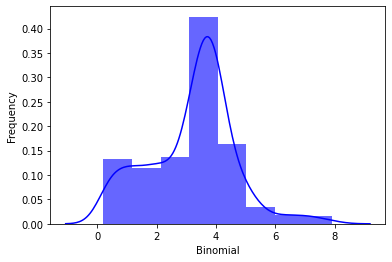

/home/jayasanka/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


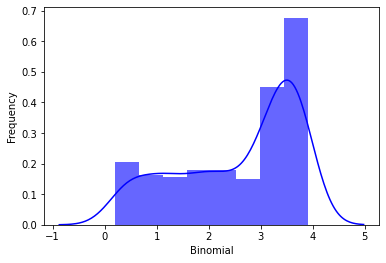

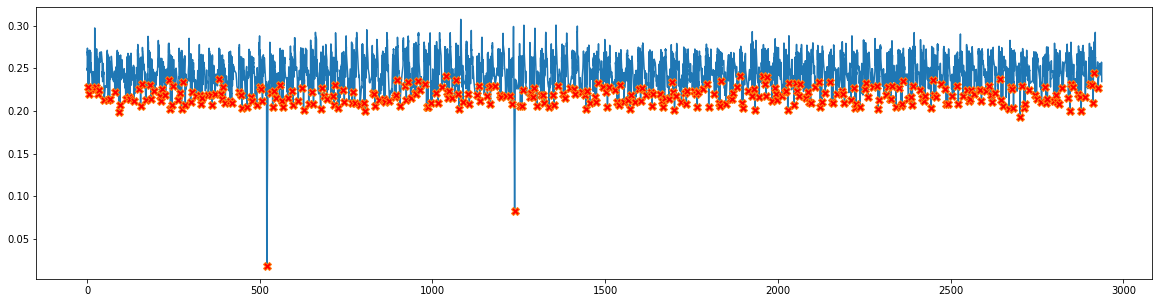

/home/jayasanka/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


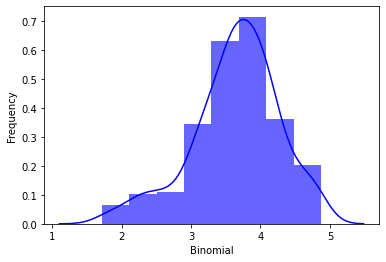

In [839]:
#heel strike
dt_plus_hs_r=time_diff(f_valley_plus_R)
distribution(dt_plus_hs_r)
dt_plus_hs_r_new=remove_time_gap(dt_plus_hs_r)
distribution(dt_plus_hs_r_new)
plus_peaks_hs_r=remove_distinc(dt_plus_hs_r,df_plus,Time_to_index_ratio,df_plus.f_R)
dt_plus_hs_r=time_diff(plus_peaks_hs_r)
dt_plus_hs_r_cleaned=remove_time_gap(dt_plus_hs_r)
distribution(dt_plus_hs_r_cleaned)

# minus direction-Right

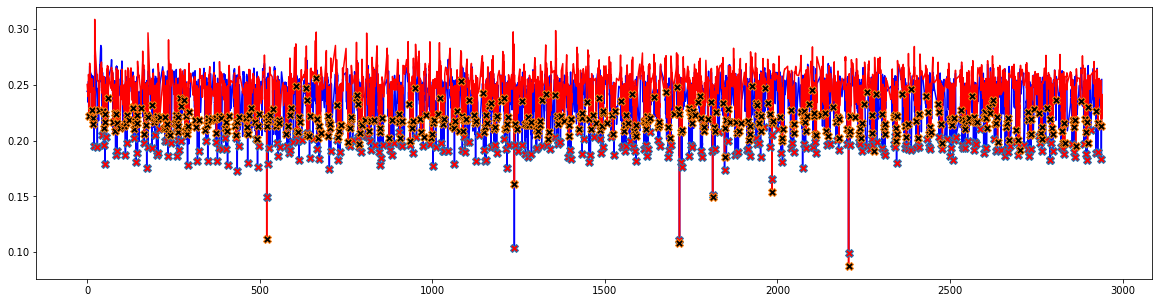

In [840]:
h_valley_minus_R, _ = find_peaks(-df_minus.h_R,prominence=0.05)
f_valley_minus_R, _ = find_peaks(-df_minus.f_R,prominence=0.025)
plt.figure(figsize=(20,5))
plt.plot(df_minus.t,df_minus.h_R,'b')
plt.plot(df_minus.t,df_minus.f_R,'r')
plt.plot(df_minus.t[h_valley_minus_R], df_minus.h_R[h_valley_minus_R],"X",markerfacecolor='red',markersize=8)
plt.plot(df_minus.t[f_valley_minus_R], df_minus.f_R[f_valley_minus_R],"X",markerfacecolor='black',markersize=8)
plt.show()

/home/jayasanka/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


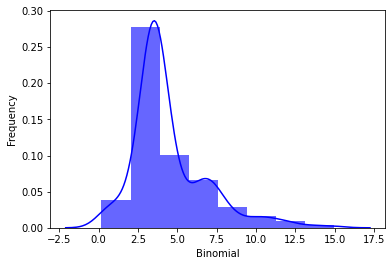

/home/jayasanka/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


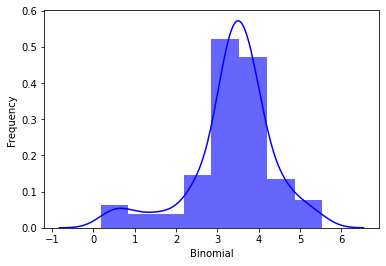

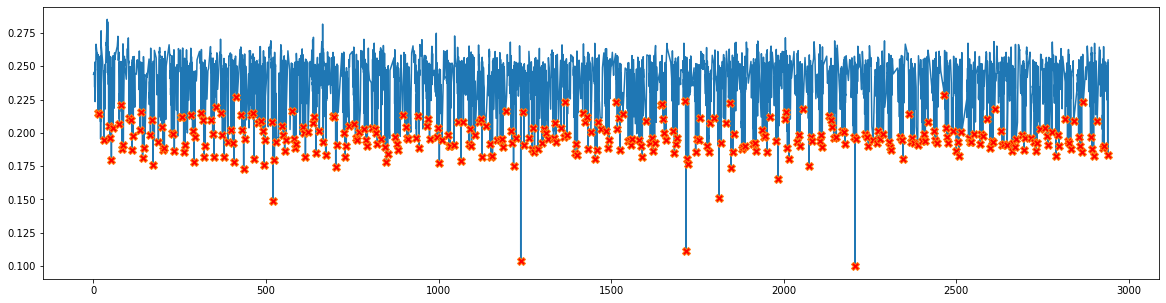

/home/jayasanka/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


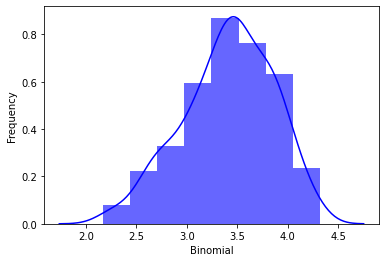

In [841]:
#toe off
dt_minus_to_r=time_diff(h_valley_minus_R)
distribution(dt_minus_to_r)
dt_minus_to_r_new=remove_time_gap(dt_minus_to_r)
distribution(dt_minus_to_r_new)
minus_peaks_to_r=remove_distinc(dt_minus_to_r,df_minus,Time_to_index_ratio,df_minus.h_R)
dt_minus_to_r=time_diff(minus_peaks_to_r)
dt_minus_to_r_cleaned=remove_time_gap(dt_minus_to_r)
distribution(dt_minus_to_r_cleaned)

/home/jayasanka/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


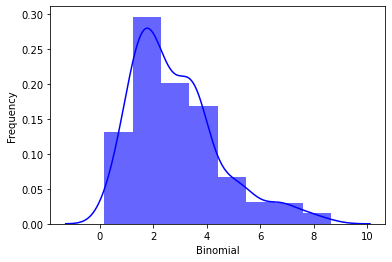

/home/jayasanka/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


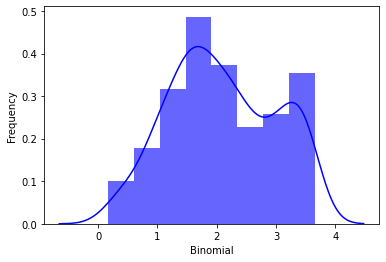

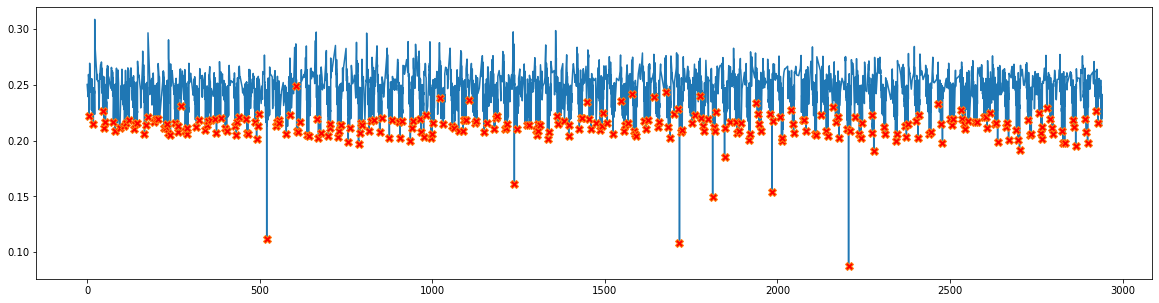

/home/jayasanka/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


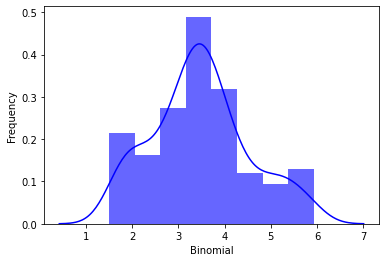

In [842]:
#heel strike
dt_minus_hs_r=time_diff(f_valley_minus_R)
distribution(dt_minus_hs_r)
dt_minus_hs_r_new=remove_time_gap(dt_minus_hs_r)
distribution(dt_minus_hs_r_new)
minus_peaks_hs_r=remove_distinc(dt_minus_hs_r,df_minus,Time_to_index_ratio,df_minus.f_R)
dt_minus_hs_r=time_diff(minus_peaks_hs_r)
dt_minus_hs_r_cleaned=remove_time_gap(dt_minus_hs_r)
distribution(dt_minus_hs_r_cleaned)

# sampling-Right

In [843]:
sample_strikes_plus_hs_R=sample(df_plus,plus_peaks_hs_r,time_return_points)
sample_strikes_minus_hs_R=sample(df_minus,minus_peaks_hs_r,time_return_points)
sample_strikes_plus_to_R=sample(df_plus,plus_peaks_to_r,time_return_points)
sample_strikes_minus_to_R=sample(df_minus,minus_peaks_to_r,time_return_points)


# find heel strike and toe-off time-left

# Plus direction-left

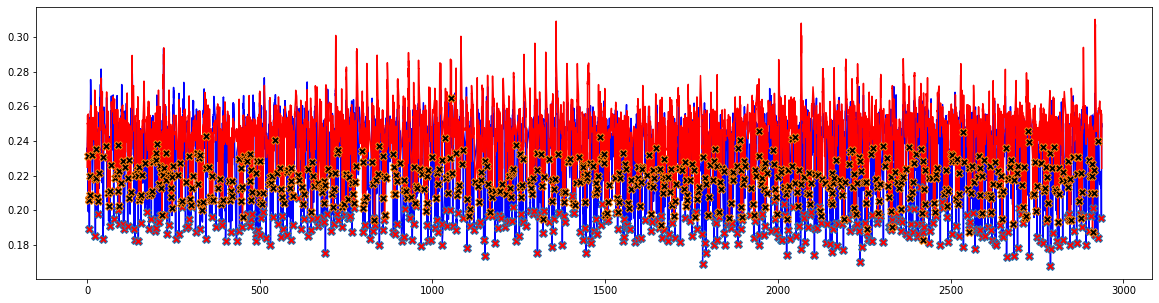

In [844]:
h_valley_plus_L, _ = find_peaks(-df_plus.h_L,prominence=0.05)
f_valley_plus_L, _ = find_peaks(-df_plus.f_L,prominence=0.02)
plt.figure(figsize=(20,5))
plt.plot(df_plus.t,df_plus.h_L,'b')
plt.plot(df_plus.t,df_plus.f_L,'r')
plt.plot(df_plus.t[h_valley_plus_L], df_plus.h_L[h_valley_plus_L],"X",markerfacecolor='red',markersize=8)
plt.plot(df_plus.t[f_valley_plus_L], df_plus.f_L[f_valley_plus_L],"X",markerfacecolor='black',markersize=8)
plt.show()

/home/jayasanka/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


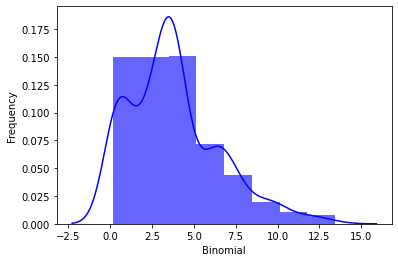

/home/jayasanka/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


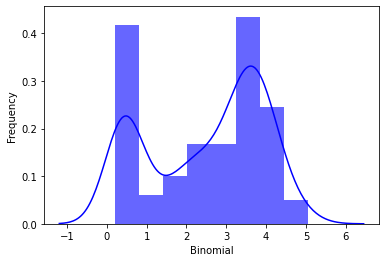

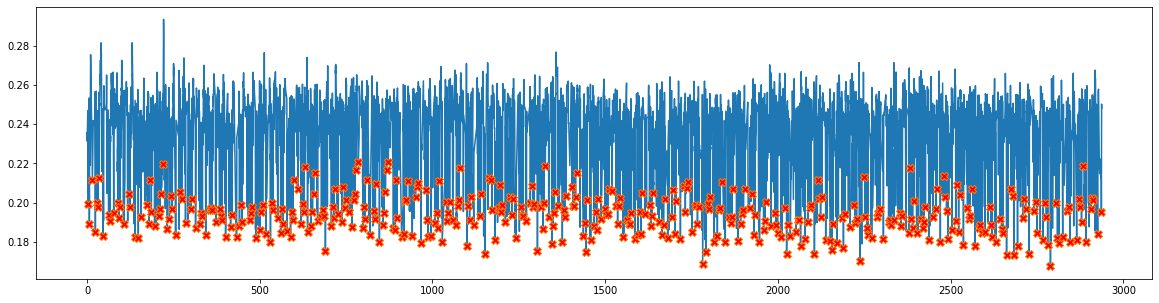

/home/jayasanka/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


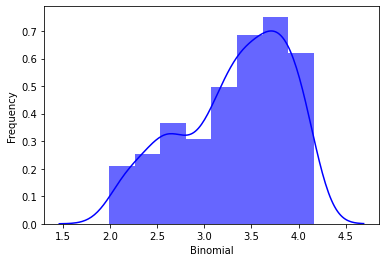

In [845]:
#toe off
dt_plus_to_l=time_diff(h_valley_plus_L)
distribution(dt_plus_to_l)
dt_plus_to_l_new=remove_time_gap(dt_plus_to_l)
distribution(dt_plus_to_l_new)
plus_peaks_to_l=remove_distinc(dt_plus_to_l,df_plus,Time_to_index_ratio,df_plus.h_L)
dt_plus_to_l=time_diff(plus_peaks_to_l)
dt_plus_to_l_cleaned=remove_time_gap(dt_plus_to_l)
distribution(dt_plus_to_l_cleaned)

/home/jayasanka/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


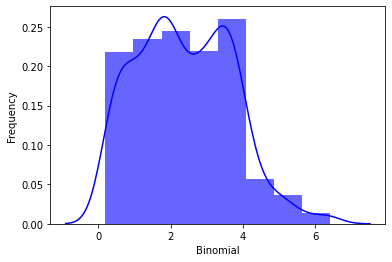

/home/jayasanka/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


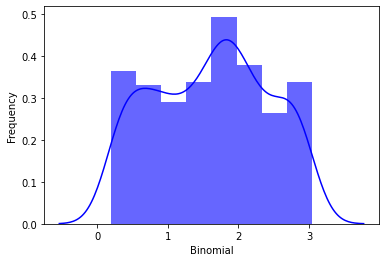

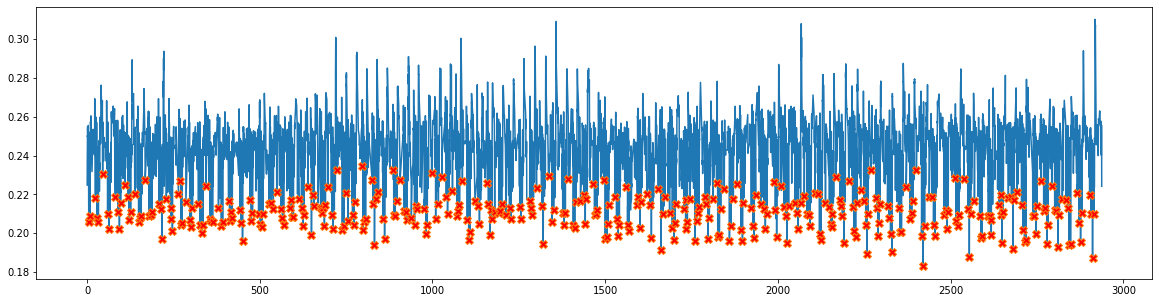

/home/jayasanka/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


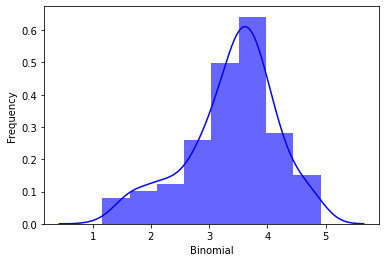

In [846]:
#heel strike
dt_plus_hs_l=time_diff(f_valley_plus_L)
distribution(dt_plus_hs_l)
dt_plus_hs_l_new=remove_time_gap(dt_plus_hs_l)
distribution(dt_plus_hs_l_new)
plus_peaks_hs_l=remove_distinc(dt_plus_hs_l,df_plus,Time_to_index_ratio,df_plus.f_L)
dt_plus_hs_l=time_diff(plus_peaks_hs_l)
dt_plus_hs_l_cleaned=remove_time_gap(dt_plus_hs_l)
distribution(dt_plus_hs_l_cleaned)

# minus-direction-left

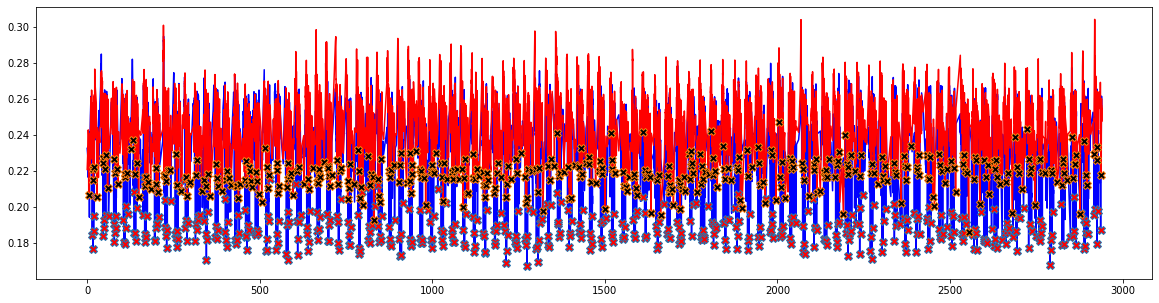

In [847]:
h_valley_minus_L, _ = find_peaks(-df_minus.h_L,prominence=0.05)
f_valley_minus_L, _ = find_peaks(-df_minus.f_L,prominence=0.03)
plt.figure(figsize=(20,5))
plt.plot(df_minus.t,df_minus.h_L,'b')
plt.plot(df_minus.t,df_minus.f_L,'r')
plt.plot(df_minus.t[h_valley_minus_L], df_minus.h_L[h_valley_minus_L],"X",markerfacecolor='red',markersize=8)
plt.plot(df_minus.t[f_valley_minus_L], df_minus.f_L[f_valley_minus_L],"X",markerfacecolor='black',markersize=8)
plt.show()

/home/jayasanka/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


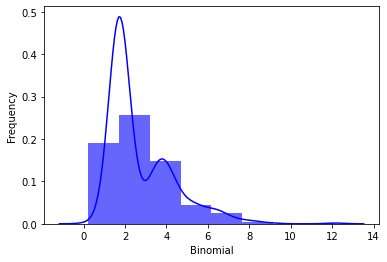

/home/jayasanka/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


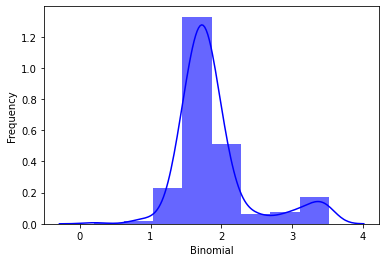

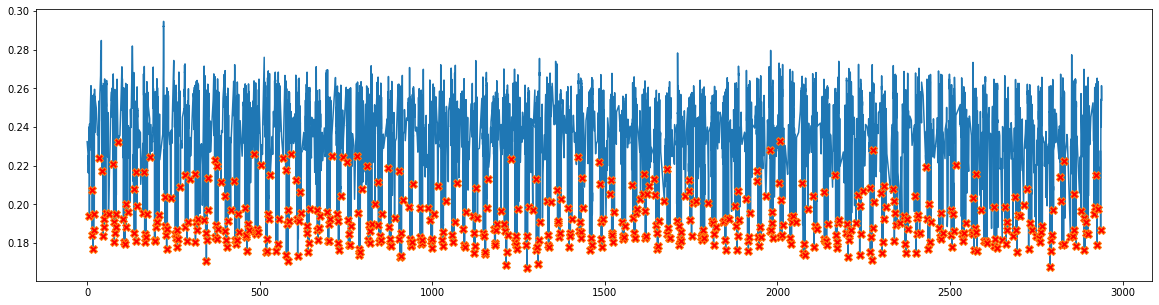

/home/jayasanka/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


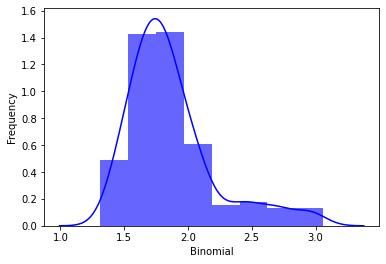

In [848]:
#toe off
dt_minus_to_l=time_diff(h_valley_minus_L)
distribution(dt_minus_to_l)
dt_minus_to_l_new=remove_time_gap(dt_minus_to_l)
distribution(dt_minus_to_l_new)
minus_peaks_to_l=remove_distinc(dt_minus_to_l,df_minus,Time_to_index_ratio,df_minus.h_L)
dt_minus_to_l=time_diff(minus_peaks_to_l)
dt_minus_to_l_cleaned=remove_time_gap(dt_minus_to_l)
distribution(dt_minus_to_l_cleaned)

/home/jayasanka/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


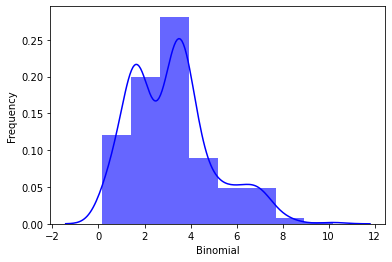

/home/jayasanka/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


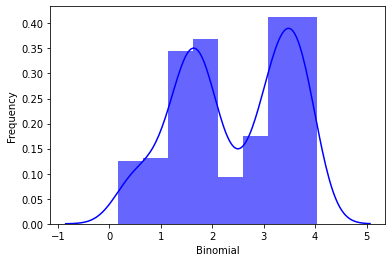

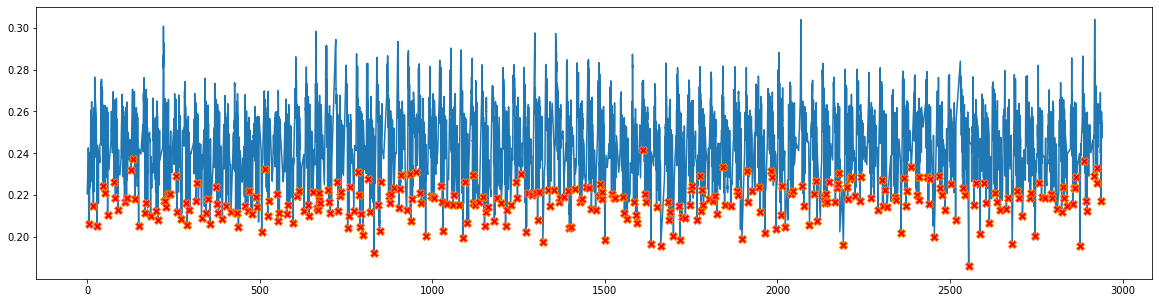

/home/jayasanka/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


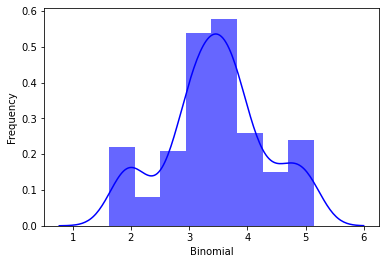

In [849]:
#heel strike
dt_minus_hs_l=time_diff(f_valley_minus_L)
distribution(dt_minus_hs_l)
dt_minus_hs_l_new=remove_time_gap(dt_minus_hs_l)
distribution(dt_minus_hs_l_new)
minus_peaks_hs_l=remove_distinc(dt_minus_hs_l,df_minus,Time_to_index_ratio,df_minus.f_L)
dt_minus_hs_l=time_diff(minus_peaks_hs_l)
dt_minus_hs_l_cleaned=remove_time_gap(dt_minus_hs_l)
distribution(dt_minus_hs_l_cleaned)

# sampling-left

In [850]:
sample_strikes_plus_hs_L=sample(df_plus,plus_peaks_hs_l,time_return_points)
sample_strikes_minus_hs_L=sample(df_minus,minus_peaks_hs_l,time_return_points)
sample_strikes_plus_to_L=sample(df_plus,plus_peaks_to_l,time_return_points)
sample_strikes_minus_to_L=sample(df_minus,minus_peaks_to_l,time_return_points)
sample_strikes_plus_hs_L=sample_strikes_plus_hs_L[plus::2]
sample_strikes_plus_to_L=sample_strikes_plus_to_L[plus::2]
sample_strikes_minus_hs_L=sample_strikes_minus_hs_L[minus::2]
sample_strikes_minus_to_L=sample_strikes_minus_to_L[minus::2]

In [851]:
def time_diff_array(first,second):
    second_array=[]
    first_array=[]
    try:
        if len(first)==len(second):
            if second[0]>first[0]:
                #print(1)
                Lstep=np.subtract(second,first) 
                second_array=Lstep
                Rstep=np.subtract(first[1:],second[:-1]) 
                first_array=Rstep
            else:
                #print(2)
                Rstep=np.subtract(first,second)
                first_array=Rstep
                Lstep=np.subtract(second[1:],first[:-1]) 
                second_array=Lstep

        elif (len(first)+1)==len(second):#when left strides are max by one
            if first[0]>second[0]:
                #print(3)
                Lstep=np.subtract(second[1:],first) 
                second_array=Lstep
                Rstep=np.subtract(first,second[:-1]) 
                first_array=Rstep

        elif len(first)==(len(second)+1):#when right strides are max by one
            if second[0]>first[0]:
                #print(4)
                Lstep=np.subtract(second,first[:-1]) 
                second_array=Lstep
                Rstep=np.subtract(first[1:],second) 
                first_array=Rstep

        else:
            #print(5)
            second_array.append('ooa')
            first_array.append('ooa')
            
    except:
            second_array.append('ooa')
            first_array.append('ooa')
        


    return first_array,second_array
                
    

In [852]:
time_diff_array([2,5,8],[3,7,10])

(array([2, 1]), array([1, 2, 2]))

# Calculate swing time

In [853]:
def swing_array(sample_strikes_hs,sample_strikes_to):
    swing_array=[]
    for i in range(len(sample_strikes_hs)):
        if not len(sample_strikes_hs[i])==0:
            #print(len(sample_strikes_plus_R[i]),len(sample_strikes_plus_L[i]))
            hs_to,_=time_diff_array(sample_strikes_hs[i],sample_strikes_to[i])
            swing_array.append(hs_to)
    return swing_array
        

In [854]:
swing_array_plus_R=swing_array(sample_strikes_plus_hs_R,sample_strikes_plus_to_R)
print(swing_array_plus_R)

[array([4.63756061]), array([1.25435424, 1.1556592 , 1.21698689]), array([5.24641061]), array([0.97862053, 1.11223054]), array([], dtype=float64), array([1.05033112, 0.98718596]), array([1.15388703]), array([1.46399045, 1.30801392]), array([], dtype=float64), array([1.14854932, 1.00173235, 1.15832186]), array([], dtype=float64), array([3.10542583]), array([], dtype=float64), array([1.26483941, 1.21298504, 1.21919155]), array([0.]), array([ 1.29293275,  1.10825562, -0.24427319]), array([6.97151971]), array([1.3970933 , 0.84619522, 1.24582553]), ['ooa'], ['ooa'], ['ooa'], array([1.20390487, 1.17427349, 1.19872403]), array([1.17148161]), array([3.07411408]), array([], dtype=float64), array([3.05191994, 1.26907849, 0.        ]), array([], dtype=float64), array([1.05969095, 1.29877687]), array([0.]), array([3.00792003]), array([5.95188594]), array([2.97918677]), array([], dtype=float64), array([1.39659238, 0.8916142 ]), array([0.]), array([1.08071113, 0.89161301, 1.33203697]), array([], dty

In [855]:
swing_array_plus_L=swing_array(sample_strikes_plus_hs_L,sample_strikes_plus_to_L)
print(swing_array_plus_L)

[array([0.097579  , 0.98230696, 1.33562422]), array([0.93744993]), array([0.85888052, 1.37644172, 1.26782608]), array([0.8825891 , 1.12858748]), [], array([0.97194099, 1.10197282, 1.46750569]), array([0.97147822, 1.05749226, 1.24913597]), array([3.07590246, 1.13348222, 1.14724326]), array([1.38596654, 1.15718198]), array([1.38932991, 0.98062968]), array([0.89596915, 1.29070497, 1.06502676]), array([0.88671589, 1.39202261, 1.31557107]), array([5.35934663, 4.99891543]), array([1.48851132, 1.15883136]), array([1.42498732, 1.12431979, 1.06929588]), array([1.28026509, 1.0679009 , 0.95867753]), array([0.8728621 , 1.30433321, 1.15100265]), array([1.09711528, 4.55452347]), array([1.17800927, 1.1859386 , 1.06458139]), array([0.97994208, 1.08051133, 0.98604631]), array([1.09175873, 1.19031644, 0.91257119]), array([0.90764403, 1.4420588 , 1.23029733]), array([1.06981516, 1.1366806 , 1.24616528, 0.        ]), ['ooa'], array([1.08106184, 0.96049166, 3.72016835]), array([1.01213026, 1.10815859, 1.44

In [856]:
swing_array_minus_R=swing_array(sample_strikes_minus_hs_R,sample_strikes_minus_to_R)
swing_array_minus_L=swing_array(sample_strikes_minus_hs_L,sample_strikes_minus_to_L)

In [857]:
def avrg(x):
    array=[]
    for i in x:
        if i==['ooa']:
            array.append(['ooa'])
        elif len(i)==0:
            array.append([])
        else:
            s=0
            for j in i:
                s+=j
            m=s/len(i)
            array.append(m)    
    return array

In [858]:
avg_swing_plus_R=avrg(swing_array_plus_R)
avg_swing_plus_L=avrg(swing_array_plus_L)
avg_swing_minus_R=avrg(swing_array_minus_R)
avg_swing_minus_L=avrg(swing_array_minus_L)

/tmp/ipykernel_16589/2757863319.py:4: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if i==['ooa']:


In [859]:
T7=comb_dir_arrays(avg_swing_plus_R,avg_swing_minus_R,plus,minus)
T8=comb_dir_arrays(avg_swing_plus_L,avg_swing_minus_L,plus,minus)

In [860]:
T_s[3][0]=T7
T_s[3][1]=T8

In [861]:

#output = open('side.pkl', 'wb')
#pickle.dump(T_s, output)
#output.close()

# calculate double support time

In [862]:
def double_support_time(to_R,hs_R,to_L,hs_L):
    array=[]
    if to_R==hs_L==hs_R==hs_L:
        if to_R[0]>hs_L[i][0]:
            dst1=np.subtract(to_R,hs_L)
            dst2=np.subtract(to_L[1:],hs_R)
            dst=np.add(dst1,dst2)
            array.append(dst)
        elif to_L[i][0]>hs_R[i][0]:
            dst1=np.subtract(to_R[1:],hs_L)
            dst2=np.subtract(to_L,hs_R)
            dst=np.add(dst1,dst2)
            array.append(dst)
        else:
            dst_array.append("ooa")
        return array
    else:
        return "ooa"   

In [863]:
def double_support_time_array(sample_strikes_to_R,sample_strikes_hs_R,sample_strikes_to_L,sample_strikes_hs_L):
    dst_array=[]
    for i in range(min(len(sample_strikes_to_R),len(sample_strikes_to_L))):
        if not len(sample_strikes_to_R[i])==0:
            array=double_support_time(sample_strikes_to_R[i],sample_strikes_hs_R[i],sample_strikes_to_L[i],sample_strikes_hs_L[i])
            dst_array.append(array)
    return dst_array
        

In [864]:
double_support_time(sample_strikes_plus_to_R,sample_strikes_plus_hs_R,sample_strikes_plus_to_L,sample_strikes_plus_hs_L)

'ooa'

# calculate stance time ratio

In [865]:

T_plus=np.add(avg_stride_plus_L,avg_stride_plus_R)/2
T_minus=np.add(avg_stride_minus_L,avg_stride_minus_R)/2

In [866]:
def stance_time_ratio_array(sample_strikes_to_R,sample_strikes_hs_R,sample_strikes_to_L,sample_strikes_hs_L,T):
    str_array=[]
    for i in range(min(len(sample_strikes_to_R),len(sample_strikes_to_L))):
        if not (len(sample_strikes_to_R[i])==0 or len(sample_strikes_to_L[i])==0 or len(sample_strikes_hs_R[i])==0 or len(sample_strikes_hs_L[i])==0):
            left,_=time_diff_array(sample_strikes_to_L[i][1:],sample_strikes_hs_L[i][:-1])
            right,_=time_diff_array(sample_strikes_to_R[i][1:],sample_strikes_hs_R[i][:-1])
            if left==['ooa'] or right==['ooa']:
                str_array.append(['ooa'])
            else:
                if len(left)>len(right):
                    right=np.concatenate((right, [np.mean(right)]*abs(len(left)-len(right))), axis=0)
                elif len(left)<len(right):
                    left=np.concatenate((left, [np.mean(left)]*abs(len(left)-len(right))), axis=0)
                array=np.add(left,right)
                print(array)
                array=array/T[i]
                str_array.append(array)

    return str_array

In [867]:
STR_plus=stance_time_ratio_array(sample_strikes_plus_to_R,sample_strikes_plus_hs_R,sample_strikes_plus_to_L,sample_strikes_plus_hs_L,T_plus)
STR_minus=stance_time_ratio_array(sample_strikes_minus_to_R,sample_strikes_minus_hs_R,sample_strikes_minus_to_L,sample_strikes_minus_hs_L,T_minus)
print(STR_plus)
print(STR_minus)

[9.02634716 8.53938937]
[nan]
[nan nan]
[nan nan]
[9.39278126 9.09284186]
[7.01667428 6.90568972]
[9.14150643 8.98922634]
[9.24717951 8.67460513]
[nan nan]
[]
[nan nan]
[nan nan]
[12.00399303 12.78450513 12.14140415]
[10.60960317 10.24363399]
[nan nan]
[15.93800592 15.54467726]
[]
[]
[]
[9.76672983 8.44602752 8.57564795]
[nan nan nan]
[]
[nan nan]
[7.30013561 7.09738994]
[13.9841361  12.91912961]
[13.70277214 12.94020677]
[13.91229582 13.39555073]
[nan nan]
[nan nan nan]
[nan]
[10.00108528  9.37202883]
[4.19287729 3.21305132]
[14.59537435 12.91843033]
[nan nan]
[nan nan nan]
[nan nan]
[nan nan]
[]
[nan nan]
[nan nan]
[['ooa'], array([2.42883259, 2.29780074]), ['ooa'], array([nan]), ['ooa'], array([nan, nan]), ['ooa'], array([nan, nan]), ['ooa'], array([2.42968588, 2.3520988 ]), ['ooa'], array([2.24129323, 2.20584211]), ['ooa'], array([2.58461058, 2.54155588]), ['ooa'], array([2.517916  , 2.36200963]), ['ooa'], array([nan, nan]), ['ooa'], array([], dtype=float64), ['ooa'], ['ooa'], ['oo

/tmp/ipykernel_16589/3520770124.py:7: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if left==['ooa'] or right==['ooa']:
/home/jayasanka/.local/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/jayasanka/.local/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


# calculate swing time ratio

In [868]:
def swing_time_ratio_array(sample_strikes_to_R,sample_strikes_hs_R,sample_strikes_to_L,sample_strikes_hs_L,T):
    swr_array=[]
    for i in range(min(len(sample_strikes_to_R),len(sample_strikes_to_L))):
        if not len(sample_strikes_to_R[i])==0:
            left,_=time_diff_array(sample_strikes_hs_L[i],sample_strikes_to_L[i])
            right,_=time_diff_array(sample_strikes_hs_R[i],sample_strikes_to_R[i])
            if left==['ooa'] or right==['ooa']:
                swr_array.append(['ooa'])
            else:
                if len(left)>len(right):
                    right=np.concatenate((right, [np.mean(right)]*abs(len(left)-len(right))), axis=0)
                elif len(left)<len(right):
                    left=np.concatenate((left, [np.mean(left)]*abs(len(left)-len(right))), axis=0)
                array=np.add(left,right)
                array=array/T[i]
                swr_array.append(array)
            
    return swr_array

In [869]:
swing_time_ratio_array(sample_strikes_plus_to_R,sample_strikes_plus_hs_R,sample_strikes_plus_to_L,sample_strikes_plus_hs_L,T_plus)
swing_time_ratio_array(sample_strikes_plus_to_R,sample_strikes_plus_hs_R,sample_strikes_plus_to_L,sample_strikes_plus_hs_L,T_minus)

/tmp/ipykernel_16589/769455618.py:7: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if left==['ooa'] or right==['ooa']:


[array([1.64577007, 1.95327078, 2.07607158]),
 array([0.59060034, 0.56400612, 0.58053139]),
 array([2.04742121, 2.22098636, 2.1845619 ]),
 array([0.50081905, 0.60296505]),
 array([], dtype=float64),
 array([0.70312892, 0.72638491, 0.86445551]),
 array([0.73520554, 0.76495948, 0.8312528 ]),
 array([1.4204338 , 0.76389106, 0.79259743]),
 array([nan, nan]),
 array([0.56184001, 0.43885867, 0.5187641 ]),
 array([nan, nan, nan]),
 array([1.1657089 , 1.3132589 , 1.29093499]),
 array([nan, nan]),
 array([1.00852595, 0.86877359, 0.93142628]),
 array([0.49768597, 0.39267591, 0.37345845]),
 array([0.6399721 , 0.54122518, 0.1776773 ]),
 array([2.70273845, 2.85139944, 2.79857024]),
 array([0.75567248, 1.63626031, 1.2335897 ]),
 ['ooa'],
 array([0.58073497, 0.71956451, 0.66804877]),
 array([0.72157732, 0.74310441, 0.7783526 , 0.37715423]),
 ['ooa'],
 array([nan, nan, nan]),
 array([1.32981426, 0.77786533, 0.47423935]),
 array([nan, nan, nan]),
 array([0.55533298, 0.62498177]),
 ['ooa'],
 array([1.39

# .....................................................................................

In [870]:

output = open('para_values/{}.pkl'.format(name), 'wb')
pickle.dump(T_s, output)
output.close()

In [606]:
def time_diff(tn1,tn):
    return (tn1-tn)

def stride_frequency(tn1,tn):
    return 1/(tn1-tn)

def swing_time(tn_hs,tn_to):
    return tn_hs-tn_to

def doubleSupport_time(tn_hs_L,tn_to_L,tn_hs_R,tn1_to_R):
    output=(tn_to_L-tn_hs_R)+(tn1_to_R-tn_hs_L)
    return output

def foot_flat_time(tn_ff,tn_hs):
    return tn_ff-tn_hs

def stance_time_ratio(tn_hs_L,tn1_to_L,tn_hs_R,tn1_to_R,T):
    output=((tn1_to_L-tn_hs_L)+(tn1_to_R-tn_hs_R))/T
    return output

def swing_time_ratio(tn_hs_L,tn_to_L,tn_hs_R,tn_to_R,T):
    output=((tn_hs_L-tn_to_L)+(tn_hs_R-tn_to_R))/T
    return output

In [401]:
mp_holistic.POSE_CONNECTIONS

NameError: name 'mp_holistic' is not defined

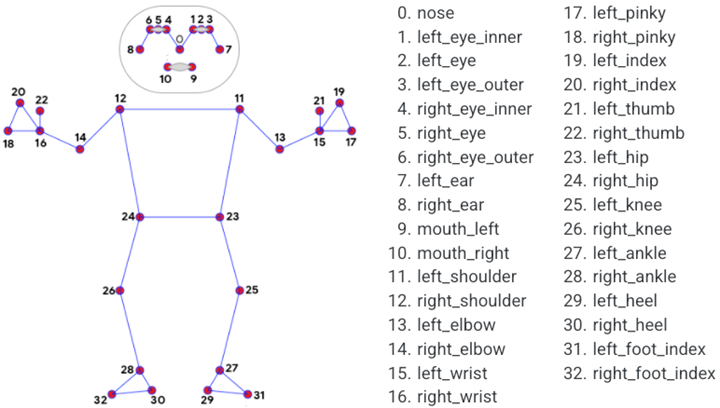